# Preamble

In [3]:
import os
from importlib import reload
os.chdir('/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WLD')

%matplotlib inline 

import mycode
reload(mycode);

In [4]:
from mycode import money
from mycode import preamble
from mycode import weights 
from mycode import maps 

from tqdm import tqdm 

%run mycode/preamble.py

reload(weights)
reload(preamble)
reload(maps)
reload(money);

In [5]:
import astroML
from astroML.plotting import scatter_contour

# Read catalogues

## cuts and filters

In [13]:
#filters to apply as reading the catalogue. 
pfilters = [
    maps.get_non_duplicated_cat
]


ffilters = [
    maps.good, 
    maps.best,
    maps.low_cond
]

## read

In [14]:
prefix = 'final_fitsLSST'
suffixes = ['n20', 'n15', 'n10', 'n05', '00', '05', '10', '15', '20' ]

In [7]:
dcats=maps.retrieve_cats(prefix, which=suffixes)
main_catsLSST = [] 
for suffix in suffixes: 
    main_catsLSST.append(dcats[suffix]) #make sure its correct order 

reading final_fitsLSSTn20
reading final_fitsLSSTn15
reading final_fitsLSSTn10
reading final_fitsLSSTn05
reading final_fitsLSST00
reading final_fitsLSST05
reading final_fitsLSST10
reading final_fitsLSST15
reading final_fitsLSST20


In [15]:
#remove duplicated galaxies and their groups. 
pmain_catsLSST = maps.get_filter_cats(main_catsLSST, pfilters) 

In [16]:
#get g = 0, g=0.02
cat1, cat2 = maps.get_intersection_cats([pmain_catsLSST[4], pmain_catsLSST[-1]])

In [17]:
scat1 = maps.get_filter_cats([cat1], ffilters)[0]
print(len(scat1))

#remember to not apply filters directly on cat2, but intersect
scat1, scat2 = maps.get_intersection_cats([scat1, cat2]) 
print(len(scat1),len(scat2))

77657
77657 77657


In [18]:
scats = maps.selection_filter(pmain_catsLSST, ffilters, pmain_catsLSST[4])

#check it works 
print([len(cat) for cat in scats])

[77573, 77573, 77573, 77573, 77573, 77573, 77573, 77573, 77573]


In [19]:
#no cut on condition number. 
pscats = maps.selection_filter(pmain_catsLSST, [maps.good, maps.best], pmain_catsLSST[4])

#check it works 
print([len(cat) for cat in pscats])

[112938, 112938, 112938, 112938, 112938, 112938, 112938, 112938, 112938]


In [20]:
pscat1 = pscats[4]
pscat2 = pscats[-1]

# Condition numbers 

## Distribution of condition numbers blending off and on 

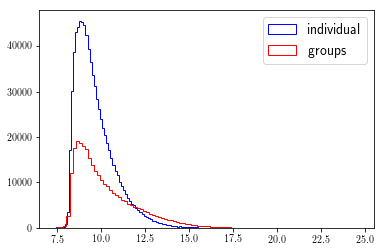

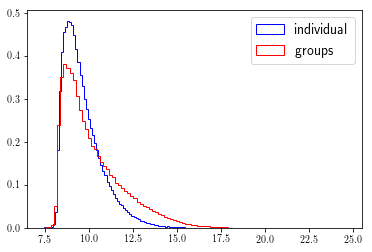

In [38]:
unique_cond = np.array(list(set(cat1[cat1['cond_num_grp'] < np.inf]['cond_num_grp'])))

plt.figure()
plt.hist(np.log10(cat1[cat1['cond_num'] < np.inf]['cond_num']) , bins=100, density=False, histtype='step', color='b', label="individual");
plt.hist(np.log10(unique_cond), bins=100, color='r', density=False, histtype='step', label="groups");
plt.legend(prop={'size':14},loc='best')


plt.figure() 
plt.hist(np.log10(cat1[cat1['cond_num'] < np.inf]['cond_num']) , bins=100, density=True, histtype='step', color='b', label="individual");
plt.hist(np.log10(unique_cond), bins=100, color='r', density=True, histtype='step', label="groups");
plt.legend(prop={'size':14},loc='best')



In [14]:
#fraction failing cuts [all galaxies]: 
print(len(cat1[cat1['cond_num_grp'] > 1e14]) / len(cat1))

#fraction of groups failing, 
print(len(set(cat1[cat1['cond_num_grp'] > 1e14]['grp_id'])) / len(set(cat1['grp_id'])))



0.288590930644638
0.04024707211305712


In [16]:
#no cut on condition number. 
pscats = maps.selection_filter(pmain_catsLSST, [maps.good, maps.best], pmain_catsLSST[4])

#check it works 
print([len(cat) for cat in pscats])

[112938, 112938, 112938, 112938, 112938, 112938, 112938, 112938, 112938]


In [17]:
pscat1 = pscats[4]

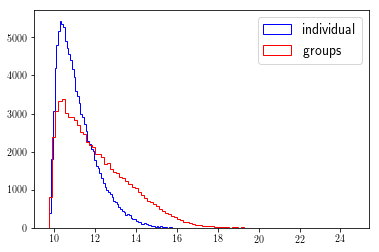

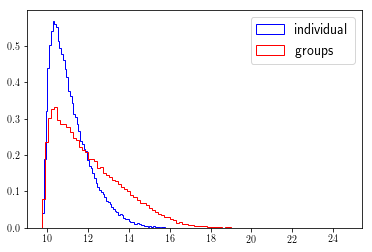

In [42]:
unique_cond = np.array(list(set(pscat1[pscat1['cond_num_grp'] < np.inf]['cond_num_grp'])))

plt.figure()
plt.hist(np.log10(pscat1[pscat1['cond_num'] < np.inf]['cond_num']) , bins=100, density=False, histtype='step', color='b', label="individual");
plt.hist(np.log10(unique_cond), bins=100, color='r', density=False, histtype='step', label="groups");
plt.legend(prop={'size':14},loc='best')


plt.figure() 
plt.hist(np.log10(pscat1[pscat1['cond_num'] < np.inf]['cond_num']) , bins=100, density=True, histtype='step', color='b', label="individual");
plt.hist(np.log10(unique_cond), bins=100, color='r', density=True, histtype='step', label="groups");
plt.legend(prop={'size':14},loc='best')




In [18]:
#fraction failing cuts [good best galaxies]: 
print(len(pscat1[pscat1['cond_num_grp'] > 1e14]) / len(pscat1))

#fraction of groups failing, 
print(len(set(pscat1[pscat1['cond_num_grp'] > 1e14]['grp_id'])) / len(set(pscat1['grp_id'])))




0.31313641112822965
0.13862050847952362


## cond num iso cut vs cond num grp 

In [6]:
#number of objects that pass grp cut but not the iso cut, 
np.sum( (cat1['cond_num_grp'] < 1e14) & (cat1['cond_num'] > 1e14)  )

0

In [6]:
#number of galaxies
np.sum( (cat1['cond_num_grp'] < cat1['cond_num'] ))

29

In [14]:
len(cat1[ (cat1['snr_grpf'] == 0)&(cat1['cond_num_grp'] == np.inf)])

1243

In [12]:
len(cat1[cat1['cond_num_grp'] == np.inf])

2141

In [10]:
print(np.log10(cat1[(cat1['cond_num_grp'] < cat1['cond_num'])]['cond_num_grp']))
print(np.log10(cat1[(cat1['cond_num_grp'] < cat1['cond_num'])]['cond_num']))

cond_num_grp
------------
   19.655941
   21.264694
   18.899889
    11.93522
   20.465553
   14.178725
   11.364027
   14.424226
   18.538391
   20.675615
         ...
   18.633066
   18.078352
   18.003159
   12.481124
   21.940836
   12.582288
   11.177645
   12.488251
   23.172478
   24.649273
   12.559674
Length = 29 rows
 cond_num
---------
      inf
      inf
      inf
 11.93522
      inf
14.181977
11.364027
14.427945
      inf
      inf
      ...
      inf
      inf
      inf
12.481125
      inf
 12.58229
11.177645
12.488254
      inf
      inf
12.559686
Length = 29 rows


## condition number vs. bias 

### all galaxies

In [20]:
cond = (cat1['cond_num'] < np.inf) & (cat1['snr_grpf']  != 0) & (cat1['cond_num_grp'] < np.inf)
cond2 = cond & (cat1['grp_size']==1)

cond_num_iso = np.log10(cat1[cond]['cond_num'])
cond_num_grp = np.log10(cat1[cond]['cond_num_grp'])
bias_iso = np.log10(np.absolute(cat1[cond]['bias_g1']))
bias_grp = np.log10(np.absolute(cat1[cond]['bias_g1_grp']))

#check the bottom plots for objects that have grp size= 1. 
cond_num_iso2 = np.log10(cat1[cond2]['cond_num'])
cond_num_grp2 = np.log10(cat1[cond2]['cond_num_grp'])
bias_iso2 = np.log10(np.absolute(cat1[cond2]['bias_g1']))
bias_grp2 = np.log10(np.absolute(cat1[cond2]['bias_g1_grp']))

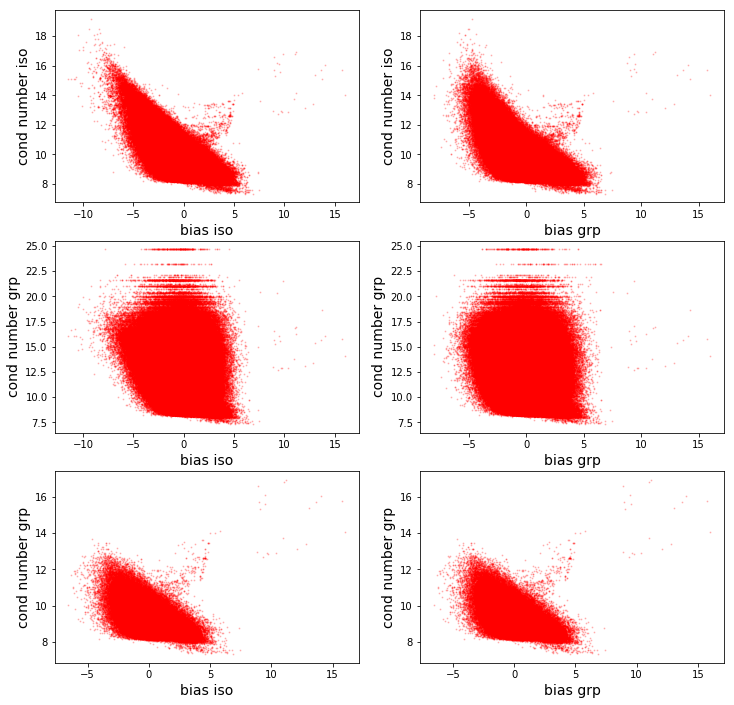

In [19]:
fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(12,12))
axes = axs.flatten()
axes[0].scatter(bias_iso, cond_num_iso, c='r', alpha=0.2, s=1)
axes[0].set_xlabel("bias iso", size=14); 
axes[0].set_ylabel("cond number iso", size=14)

axes[1].scatter(bias_grp, cond_num_iso, c='r', alpha=0.2, s=1)
axes[1].set_xlabel("bias grp", size=14); 
axes[1].set_ylabel("cond number iso", size=14)

axes[2].scatter(bias_iso, cond_num_grp, c='r', alpha=0.2, s=1)
axes[2].set_xlabel("bias iso", size=14); 
axes[2].set_ylabel("cond number grp", size=14)

axes[3].scatter(bias_grp, cond_num_grp, c='r', alpha=0.2, s=1)
axes[3].set_xlabel("bias grp", size=14); 
axes[3].set_ylabel("cond number grp", size=14);

axes[4].scatter(bias_iso2, cond_num_grp2, c='r', alpha=0.2, s=1)
axes[4].set_xlabel("bias iso", size=14); 
axes[4].set_ylabel("cond number grp", size=14)

axes[5].scatter(bias_grp2, cond_num_grp2, c='r', alpha=0.2, s=1)
axes[5].set_xlabel("bias grp", size=14); 
axes[5].set_ylabel("cond number grp", size=14);

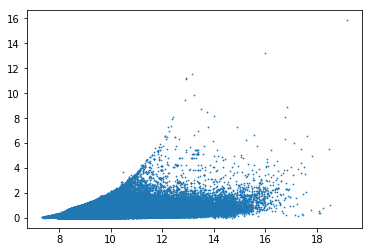

In [23]:
plt.scatter(np.log10(cat1['cond_num']), cat1['sigma_m'], s=0.5)

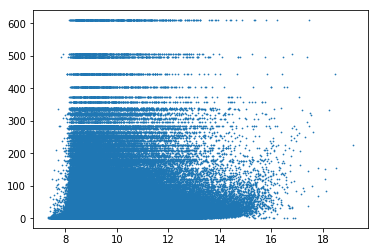

In [24]:
plt.scatter(np.log10(cat1['cond_num']), cat1['grp_size'], s=0.5)

### Galaxies with selection cuts  (excluding condition numbers cuts) 

In [53]:
temp1 = pscats[4]
cond = (temp1['cond_num'] < np.inf) & (temp1['bias_g1_grp']  != 0) & (temp1['cond_num_grp'] < np.inf)
cond_num_iso = np.log10(temp1[cond]['cond_num'])
cond_num_grp = np.log10(temp1[cond]['cond_num_grp'])
bias_iso = np.log10(np.absolute(temp1[cond]['bias_g1']))
bias_grp = np.log10(np.absolute(temp1[cond]['bias_g1_grp']))

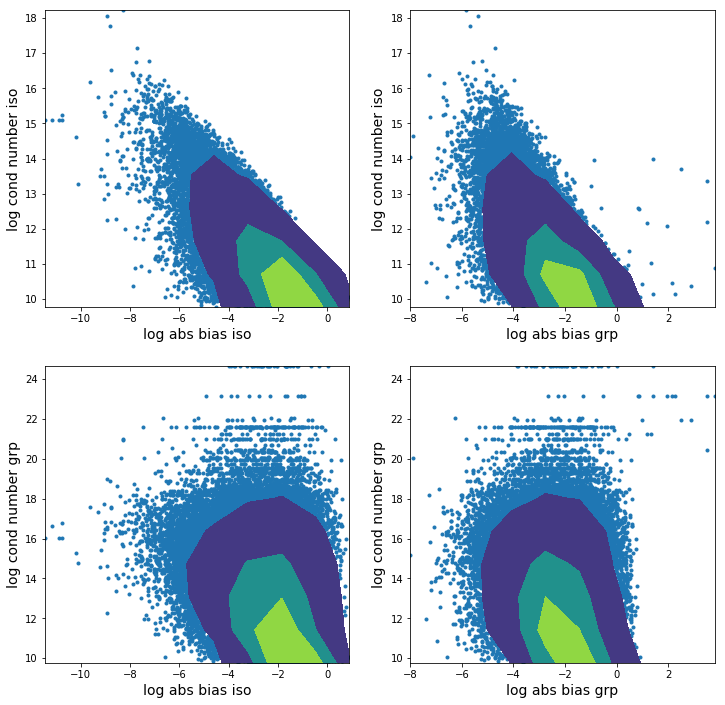

In [55]:
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
axes = axs.flatten()
num_points = len(bias_iso)

scatter_contour(bias_iso, cond_num_iso, ax=axes[0], levels=4, threshold=num_points/100)
axes[0].set_xlabel("log abs bias iso", size=14); 
axes[0].set_ylabel("log cond number iso", size=14)
# axes[0].scatter(bias_iso, cond_num_iso, c='r', alpha=0.2, s=1)


scatter_contour(bias_grp, cond_num_iso, ax=axes[1], levels=4, threshold=num_points/100)
axes[1].set_xlabel("log abs bias grp", size=14); 
axes[1].set_ylabel("log cond number iso", size=14)
# axes[1].scatter(bias_grp, cond_num_iso, c='r', alpha=0.2, s=1)


scatter_contour(bias_iso, cond_num_grp, ax=axes[2], levels=4, threshold=num_points/100)
axes[2].set_xlabel("log abs bias iso", size=14); 
axes[2].set_ylabel("log cond number grp", size=14)
# axes[2].scatter(bias_iso, cond_num_grp, c='r', alpha=0.2, s=1)

scatter_contour(bias_grp, cond_num_grp, ax=axes[3], levels=4, threshold=num_points/100)
axes[3].set_xlabel("log abs bias grp", size=14); 
axes[3].set_ylabel("log cond number grp", size=14);
# axes[3].scatter(bias_grp, cond_num_grp, c='r', alpha=0.2, s=1)

# Bias 

## bias histograms, zero shear 

In [25]:
len(scat1)

NameError: name 'scat1' is not defined

Text(0.5, 1.0, 'no condition # cuts')

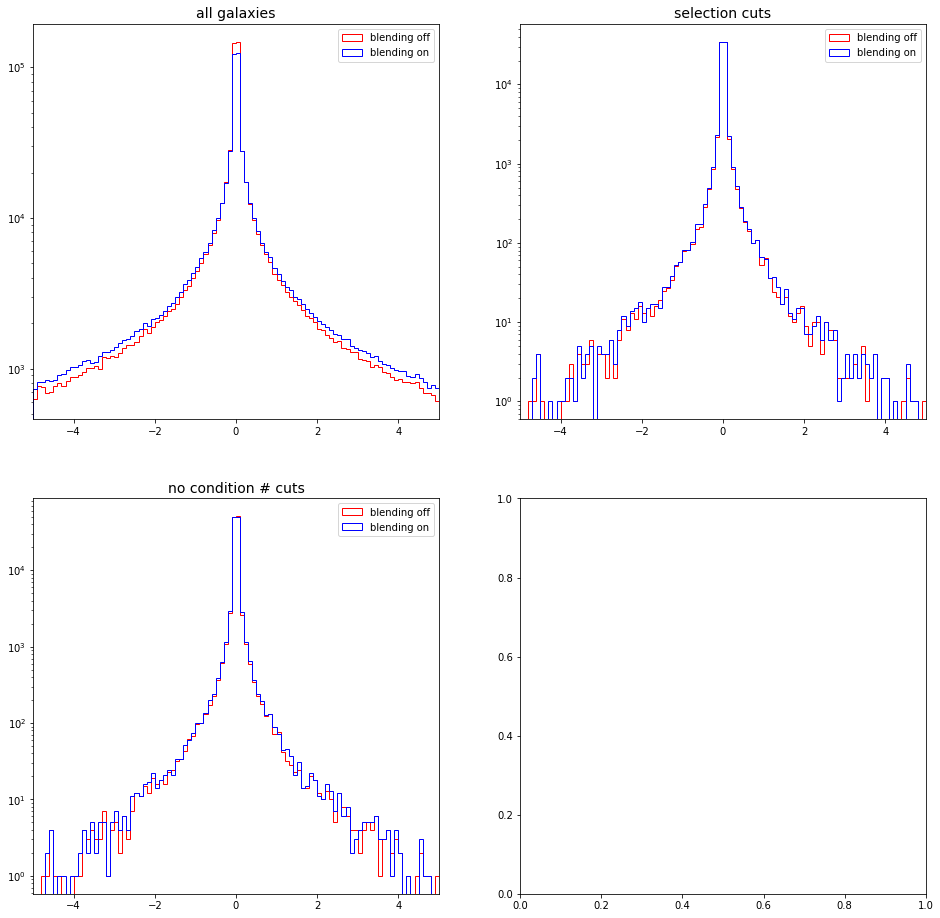

In [51]:
fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(16,16))
ax1,ax2, ax3,ax4 = axs.flatten()

ax1.hist(cat1['bias_g1'], histtype='step', range=[-5,5], bins=100, label='blending off', color='r')
ax1.hist(cat1['bias_g1_grp'], histtype='step', range=[-5,5], bins=100, label='blending on', color='b');
ax1.legend()
ax1.set_xlim(-5,5)
ax1.set_yscale("log")
ax1.set_title("all galaxies", fontsize=14)

ax2.hist(scat1['bias_g1'], histtype='step', range=[-5,5], bins=100, label='blending off', color='r')
ax2.hist(scat1['bias_g1_grp'], histtype='step', range=[-5,5], bins=100, label='blending on', color='b');
ax2.legend()
ax2.set_xlim(-5,5)
ax2.set_yscale("log")
ax2.set_title("selection cuts", fontsize=14)

ax3.hist(pscat1['bias_g1'], histtype='step', range=[-5,5], bins=100, label='blending off', color='r')
ax3.hist(pscat1['bias_g1_grp'], histtype='step', range=[-5,5], bins=100, label='blending on', color='b');
ax3.legend()
ax3.set_xlim(-5,5)
ax3.set_yscale("log")
ax3.set_title("no condition # cuts", fontsize=14)

## histograms, applied shear 0.02 

Text(0.5, 1.0, 'no condition # cuts')

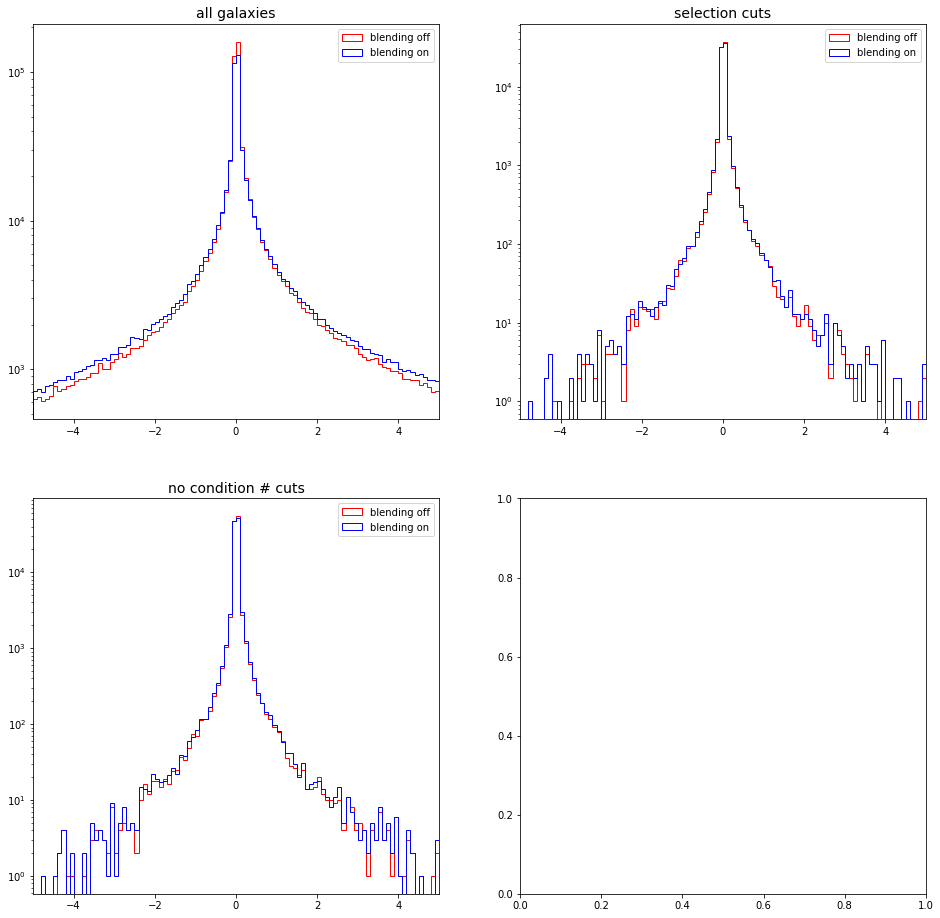

In [52]:
fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(16,16))
ax1,ax2, ax3, ax4 = axs.flatten()

ax1.hist(cat2['bias_g1'], histtype='step', range=[-5,5], bins=100, label='blending off', color='r')
ax1.hist(cat2['bias_g1_grp'], histtype='step', range=[-5,5], bins=100, label='blending on', color='b');
ax1.legend()
ax1.set_xlim(-5,5)
ax1.set_yscale("log")
ax1.set_title("all galaxies", fontsize=14)



ax2.hist(scat2['bias_g1'], histtype='step', range=[-5,5], bins=100, label='blending off', color='r')
ax2.hist(scat2['bias_g1_grp'], histtype='step', range=[-5,5], bins=100, label='blending on', color='b');
ax2.legend()
ax2.set_xlim(-5,5)
ax2.set_yscale("log")
ax2.set_title("selection cuts", fontsize=14)

ax3.hist(pscat2['bias_g1'], histtype='step', range=[-5,5], bins=100, label='blending off', color='r')
ax3.hist(pscat2['bias_g1_grp'], histtype='step', range=[-5,5], bins=100, label='blending on', color='b');
ax3.legend()
ax3.set_xlim(-5,5)
ax3.set_yscale("log")
ax3.set_title("no condition # cuts", fontsize=14)


## isolated and non-isolated bias histogram 

Text(0.5, 1.0, 'selection cuts')

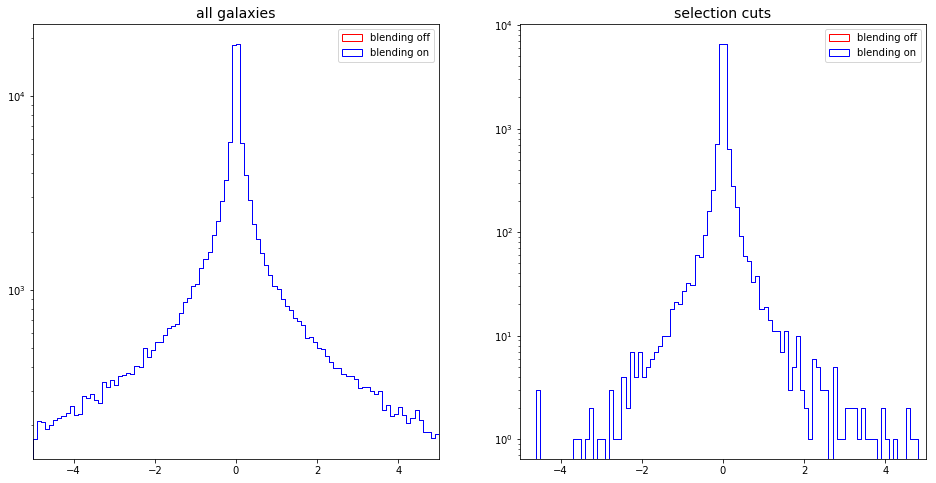

In [36]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(16,8))
ax1,ax2 = axs.flatten()
param = 'grp_size'
cond1 = cat1[param] == 1
scond1 = scat1[param]==1

ax1.hist(cat1[cond1]['bias_g1'], histtype='step', range=[-5,5], bins=100, label='blending off', color='r')
ax1.hist(cat1[cond1]['bias_g1_grp'], histtype='step', range=[-5,5], bins=100, label='blending on', color='b');
ax1.legend()
ax1.set_xlim(-5,5)
ax1.set_yscale("log")
ax1.set_title("all galaxies", fontsize=14)



ax2.hist(scat1[scond1]['bias_g1'], histtype='step', range=[-5,5], bins=100, label='blending off', color='r')
ax2.hist(scat1[scond1]['bias_g1_grp'], histtype='step', range=[-5,5], bins=100, label='blending on', color='b');
ax2.legend()
ax2.set_xlim(-5,5)
ax2.set_yscale("log")
ax2.set_title("selection cuts", fontsize=14)

Text(0.5, 1.0, 'selection cuts')

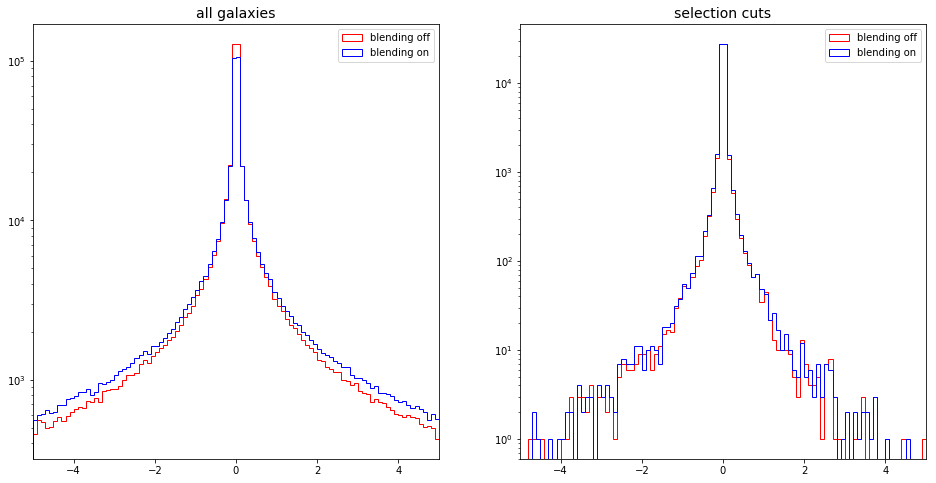

In [37]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(16,8))
ax1,ax2 = axs.flatten()
param = 'grp_size'
cond1 = cat1[param]> 1
scond1 = scat1[param]>1

ax1.hist(cat1[cond1]['bias_g1'], histtype='step', range=[-5,5], bins=100, label='blending off', color='r')
ax1.hist(cat1[cond1]['bias_g1_grp'], histtype='step', range=[-5,5], bins=100, label='blending on', color='b');
ax1.legend()
ax1.set_xlim(-5,5)
ax1.set_yscale("log")
ax1.set_title("all galaxies", fontsize=14)



ax2.hist(scat1[scond1]['bias_g1'], histtype='step', range=[-5,5], bins=100, label='blending off', color='r')
ax2.hist(scat1[scond1]['bias_g1_grp'], histtype='step', range=[-5,5], bins=100, label='blending on', color='b');
ax2.legend()
ax2.set_xlim(-5,5)
ax2.set_yscale("log")
ax2.set_title("selection cuts", fontsize=14)

In [42]:
scond1 = scat2[param] == 1
scond1

array([ True, False, False, ...,  True,  True, False])

Text(0.5, 1.0, 'selection cuts')

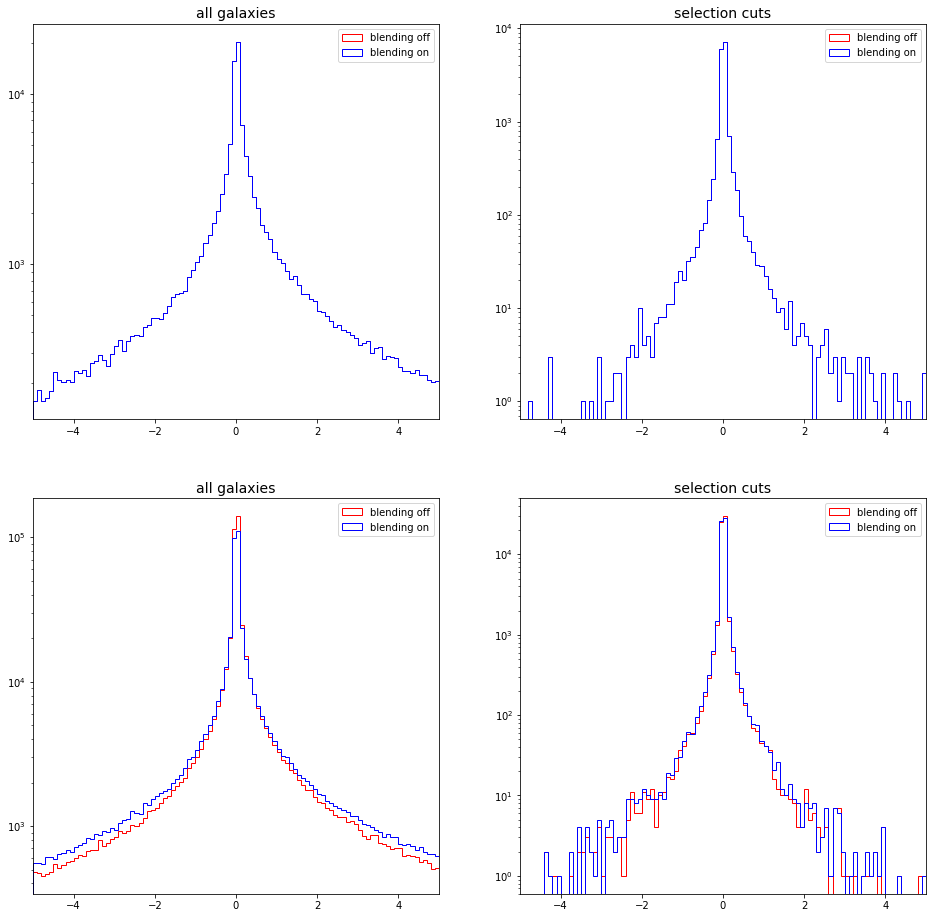

In [47]:
fig, axs = plt.subplots(nrows=2,ncols=2, figsize=(16,16))
ax1,ax2, ax3, ax4 = axs.flatten()
param = 'grp_size'
cond2 = cat2[param] == 1
scond2 = scat2[param] == 1

ax1.hist(cat2[cond2]['bias_g1'], histtype='step', range=[-5,5], bins=100, label='blending off', color='r')
ax1.hist(cat2[cond2]['bias_g1_grp'], histtype='step', range=[-5,5], bins=100, label='blending on', color='b');
ax1.legend()
ax1.set_xlim(-5,5)
ax1.set_yscale("log")
ax1.set_title("all galaxies", fontsize=14)

ax2.hist(scat2[scond2]['bias_g1'], histtype='step', range=[-5,5], bins=100, label='blending off', color='r')
ax2.hist(scat2[scond2]['bias_g1_grp'], histtype='step', range=[-5,5], bins=100, label='blending on', color='b');
ax2.legend()
ax2.set_xlim(-5,5)
ax2.set_yscale("log")
ax2.set_title("selection cuts", fontsize=14)

ax3.hist(cat2[~cond2]['bias_g1'], histtype='step', range=[-5,5], bins=100, label='blending off', color='r')
ax3.hist(cat2[~cond2]['bias_g1_grp'], histtype='step', range=[-5,5], bins=100, label='blending on', color='b');
ax3.legend()
ax3.set_xlim(-5,5)
ax3.set_yscale("log")
ax3.set_title("all galaxies", fontsize=14)

ax4.hist(scat2[~scond2]['bias_g1'], histtype='step', range=[-5,5], bins=100, label='blending off', color='r')
ax4.hist(scat2[~scond2]['bias_g1_grp'], histtype='step', range=[-5,5], bins=100, label='blending on', color='b');
ax4.legend()
ax4.set_xlim(-5,5)
ax4.set_yscale("log")
ax4.set_title("selection cuts", fontsize=14)

## scatter plot

(-2, 2)

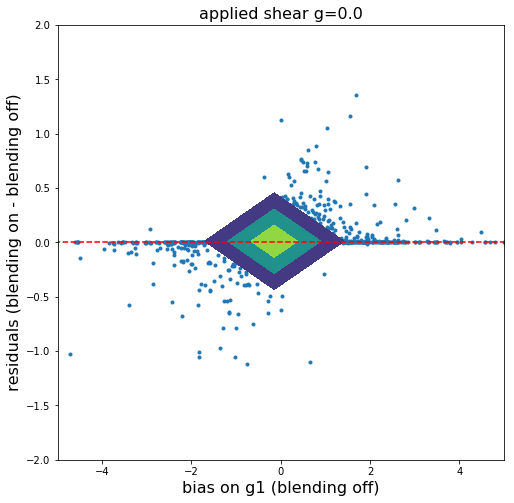

In [64]:
plt.figure(figsize=(8,8))
num_points = len(scat1['bias_g1'])
scatter_contour(scat1['bias_g1'], scat1['bias_g1_grp'] - scat1['bias_g1'], levels=4, threshold=num_points/100)
plt.plot([-10,10],[0,0],'--',color='r',);
plt.xlabel("bias on g1 (blending off)", fontsize=16)
plt.ylabel("residuals (blending on - blending off)", fontsize=16)
plt.title("applied shear g=0.0", fontsize=16)
plt.xlim(-5,5)
plt.ylim(-2,2)


(-2, 2)

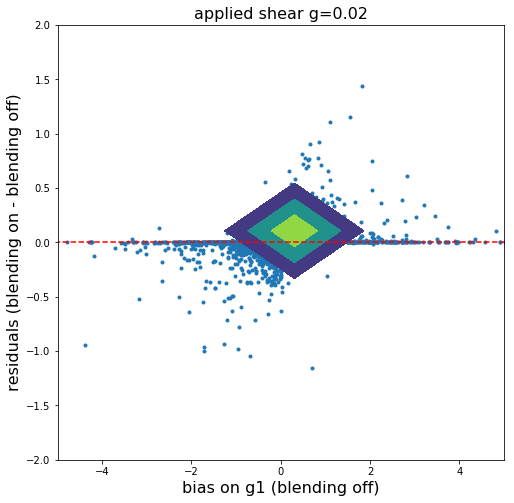

In [63]:
plt.figure(figsize=(8,8))
num_points = len(scat2['bias_g1'])
scatter_contour(scat2['bias_g1'], scat2['bias_g1_grp'] - scat2['bias_g1'], levels=4, threshold=num_points/100)
plt.plot([-10,10],[0,0],'--',color='r',);
plt.xlabel("bias on g1 (blending off)", fontsize=16)
plt.ylabel("residuals (blending on - blending off)", fontsize=16)
plt.title("applied shear g=0.02", fontsize=16)
plt.xlim(-5,5)
plt.ylim(-2,2)



## histogram of bias on s 

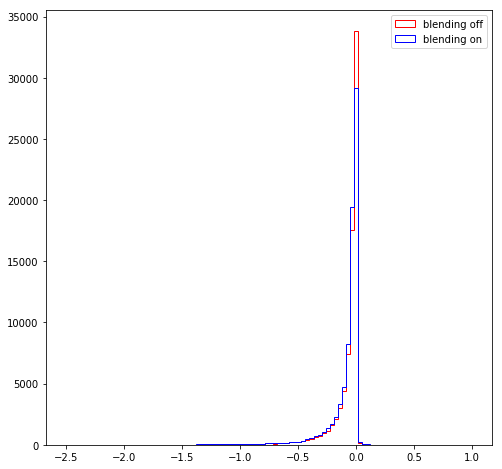

In [37]:
plt.figure(figsize=(8,8))
plt.hist(scat1['bias_s'], histtype='step', color='r', bins=100, range=[-2.5, 1], label = 'blending off'); 

plt.hist(scat1['bias_s_grp'], histtype='step', color='b', bins=100, range=[-2.5, 1], label= 'blending on'); 

plt.legend(prop={'size':10})

# Medians (low priority)

## boostraps 

In [ ]:
meds1 = weights.boot_fnc(scat1['bias_g1'], np.median, N=1000)
meds2 = weights.boot_fnc(scat2['bias_g1'], np.median, N=1000)

# Clipped Means 

## simple version 

In [62]:
orig_ids = list(scat1['db_id'])
assert orig_ids == list(scat2['db_id']) and len(orig_ids) == len(set(orig_ids)), "something is wrong"

### blending off/on for all galaxies 

In [58]:
def prepare_means_errors(ps, param, scat1, scat2):
    dbt1 = scat1[param]
    dbt2 = scat2[param]

    means1 = [] 
    errors1 = [] 
    means2 = [] 
    errors2 = [] 
    
    for p in tqdm(ps): 
        means1.append(weights.clipped_mean_simple(dbt1, p))
        errors1.append(weights.get_error(dbt1, weights.clipped_mean_fnc(p), N=1000))

        means2.append(weights.clipped_mean_simple(dbt2, p))
        errors2.append(weights.get_error(dbt2, weights.clipped_mean_fnc(p), N=1000))
        
    return means1,errors1,means2,errors2

def plot_negpos(ax, ps, vals, marker_pos, kwargs_pos, marker_neg, kwargs_neg): 
    for p, val in zip(ps, vals):
        if val > 0: 
            ax.plot(p, val, marker_pos, **kwargs_pos)
        else: 
            ax.plot(p, np.absolute(val), marker_neg, **kwargs_neg)
            


def plot_simple_clipped_means(ps, means1, errors1, means2, errors2, means1_grp, errors1_grp, 
                              means2_grp, errors2_grp, ylims=None):
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
    ax1,ax2 = axs.flatten()
    
    #obtain legend labels. 
    red_dot, = plt.plot([], [], 'ro')
    red_dot_nofill, = plt.plot([], [], "o", markerfacecolor='None', color='r')
    blue_dot, = plt.plot([],[], 'bo')
    blue_dot_nofill,  = plt.plot([],[], "o", markerfacecolor='None', color='b', markersize=8)
    
    #plot errors. 
    red_crosses, = ax1.plot(ps, errors1, 'r+', label= 'error of mean g=0')
    blue_crosses, = ax1.plot(ps, errors2, 'bx', label= 'error of means g=0.02')
    
    ax2.plot(ps, errors1_grp, 'r+', label= 'error of mean g=0')
    ax2.plot(ps, errors2_grp, 'bx', label= 'error of means g=0.02')
    
    #plot the means. 
    plot_negpos(ax1, ps, means1, 'ro', {'markersize':8}, 'o', dict(markerfacecolor='None', color='r', markersize=8))
    plot_negpos(ax1, ps, means2, 'bo', {'markersize':8}, 'o', dict(markerfacecolor='None', color='b', markersize=8))
    
    plot_negpos(ax2, ps, means1_grp, 'ro', {'markersize':8}, 'o', dict(markerfacecolor='None', color='r', markersize=8))
    plot_negpos(ax2, ps, means2_grp, 'bo', {'markersize':8}, 'o', dict(markerfacecolor='None', color='b', markersize=8))
    
    
    #add legends. 
    ax1.legend([red_dot, red_dot_nofill, blue_dot, blue_dot_nofill, red_crosses, blue_crosses], 
                   ["Means zero shear positive", "Means zero shear negative", "Means g=0.02, positive", "Means g=0.02, negative", "Error on mean zero shear", "Error on mean g=0.02"], prop={"size":10},loc='best')

    ax2.legend([red_dot, red_dot_nofill, blue_dot, blue_dot_nofill, red_crosses, blue_crosses], 
                   ["Means zero shear positive", "Means zero shear negative", "Means g=0.02, positive", "Means g=0.02, negative", "Error on mean zero shear", "Error on mean g=0.02"], prop={"size":10},loc='best')


    
    ax1.set_xlabel('quantile', size=20)
    ax1.set_yscale('log')
    ax2.set_xlabel('quantile', size=20)
    ax2.set_yscale('log')
    
    ax1.set_ylim(ylims)
    ax2.set_ylim(ylims)

In [22]:
ps = np.linspace(0, 0.5, 51)

In [10]:
means1, errors1, means2, errors2 = prepare_means_errors(ps, 'bias_g1', scat1, scat2)

means1_grp, errors1_grp, means2_grp, errors2_grp = prepare_means_errors(ps, 'bias_g1_grp', scat1, scat2) 

100%|██████████| 51/51 [08:25<00:00,  8.44s/it]


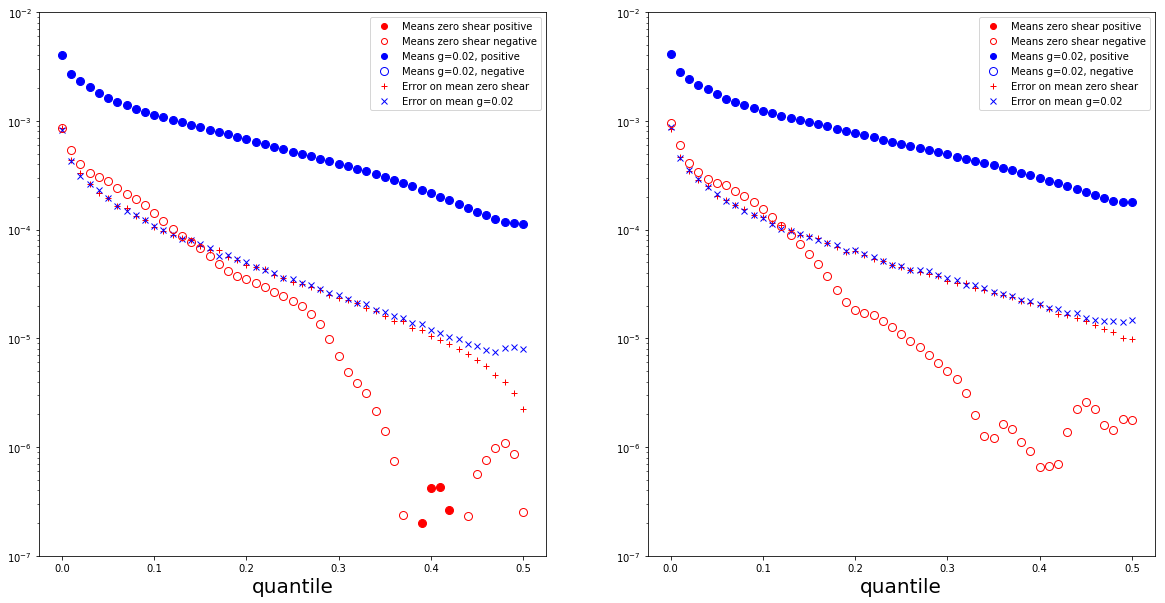

In [59]:
plot_simple_clipped_means(ps, means1, errors1, means2, errors2, means1_grp, errors1_grp, means2_grp, errors2_grp, ylims=[1e-7,1e-2])

### blending off/on for group size = 1, galaxies 

In [47]:
ps = np.linspace(0, 0.5, 51)

In [48]:
temp1 = scat1[scat1['grp_size']==1]
temp2 = scat2[scat2['grp_size']==1]

In [51]:
means1_1, errors1_1, means2_1, errors2_1 = prepare_means_errors(ps, 'bias_g1', temp1, temp2)
means1_grp_1, errors1_grp_1, means2_grp_1, errors2_grp_1 = prepare_means_errors(ps, 'bias_g1_grp', temp1, temp2) 

100%|██████████| 51/51 [02:09<00:00,  2.06s/it]


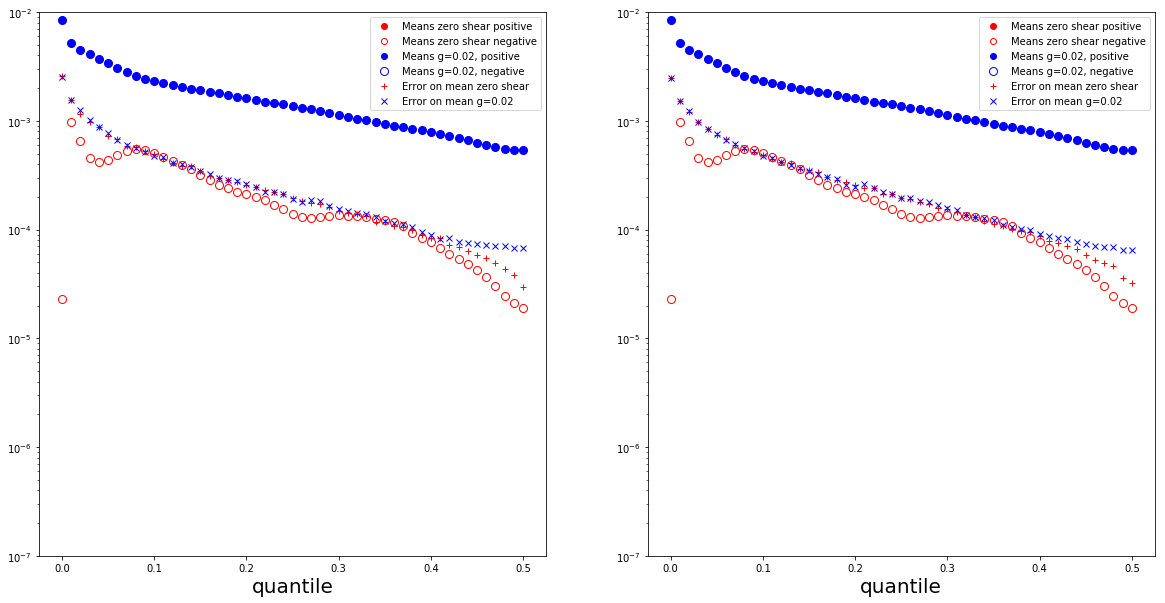

In [66]:
plot_simple_clipped_means(ps, means1_1, errors1_1, means2_1, errors2_1, means1_grp_1, 
                          errors1_grp_1, means2_grp_1, errors2_grp_1, ylims=[1e-7,1e-2])

### blending off/on for group size > 1, galaxies

In [53]:
ps = np.linspace(0, 0.5, 51)

In [63]:
temp1_grp = scat1[scat1['grp_size']>1]
temp2_grp = scat2[scat2['grp_size']>1]

In [64]:
means1_2, errors1_2, means2_2, errors2_2 = prepare_means_errors(ps, 'bias_g1', temp1_grp, temp2_grp)
means1_grp_2, errors1_grp_2, means2_grp_2, errors2_grp_2 = prepare_means_errors(ps, 'bias_g1_grp', temp1_grp, temp2_grp) 

100%|██████████| 51/51 [05:33<00:00,  5.33s/it]


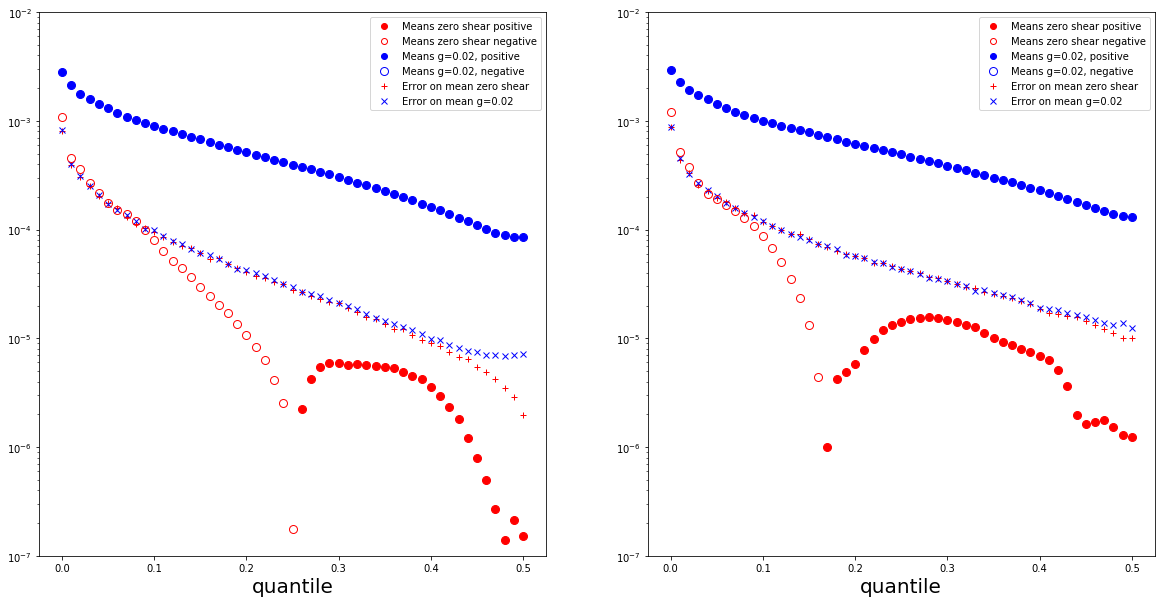

In [65]:
plot_simple_clipped_means(ps, means1_2, errors1_2, means2_2, errors2_2, 
                          means1_grp_2, errors1_grp_2, means2_grp_2, errors2_grp_2, 
                          ylims=[1e-7,1e-2])

# Weights 

In [ ]:
# before cuts and after cuts. 

In [79]:
def weights_bias_scatter(ax, cat, component, iso_or_grp, xlabel=None, title=None, xlim=(-5,5), size_dots=0.5, alpha=1): 
    orig_ids = list(range(len(cat)))
    ws = weights.get_weights(orig_ids, cat,  component, iso_or_grp, 'component')
    suffix = weights.get_iso_or_grp_suffix(iso_or_grp)

    ax.scatter(cat[f'bias_g{component}{suffix}'], ws, alpha=alpha, s=size_dots, c='b')
    ax.set_title(title, size = 18 )
    ax.set_xlabel(xlabel, size=18)
    ax.set_ylabel('Weights', size=18)
    ax.set_xlim(xlim)

## weights vs bias (blending off/on), g=0

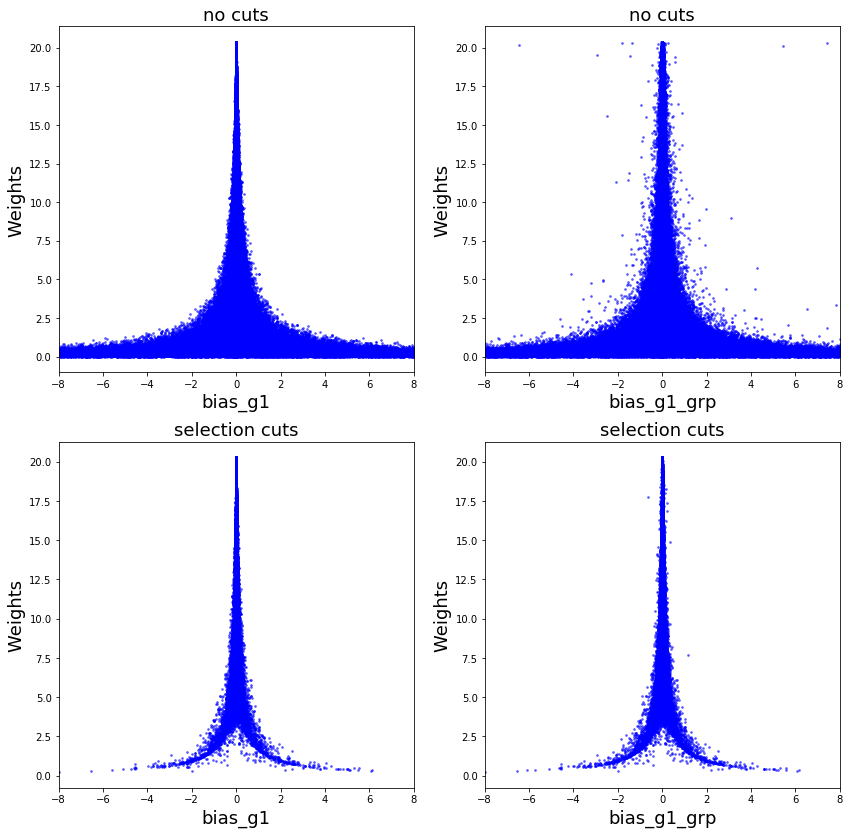

In [80]:
fig, axs = plt.subplots(2,2,figsize=(14,14))
axes = axs.flatten()
weights_bias_scatter(axes[0], cat1, '1', 'iso', xlim=[-8,8], size_dots=3, alpha=0.5, xlabel="bias_g1", title="no cuts")
weights_bias_scatter(axes[1], cat1, '1', 'grp', xlim=[-8,8], size_dots=3, alpha=0.5, xlabel="bias_g1_grp", title="no cuts")
weights_bias_scatter(axes[2], scat1, '1', 'iso', xlim=[-8,8], size_dots=3, alpha=0.5, xlabel="bias_g1", title="selection cuts")
weights_bias_scatter(axes[3], scat1, '1', 'grp', xlim=[-8,8], size_dots=3, alpha=0.5, xlabel="bias_g1_grp", title="selection cuts")

## weights vs bias (blending off/on), g=0.02

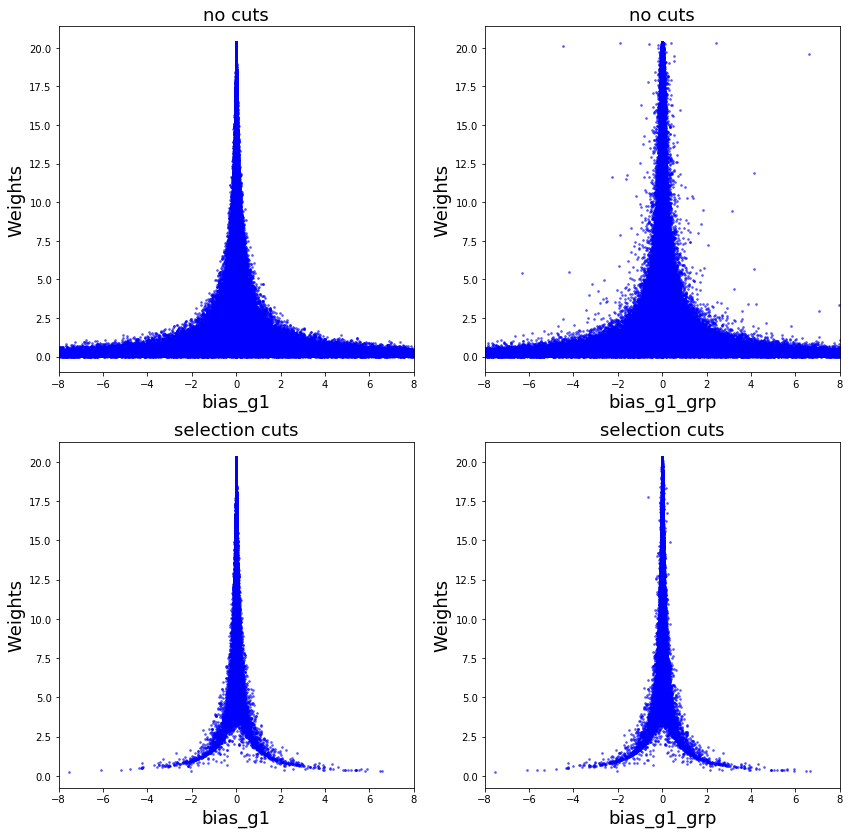

In [81]:
fig, axs = plt.subplots(2,2,figsize=(14,14))
axes = axs.flatten()
weights_bias_scatter(axes[0], cat2, '1', 'iso', xlim=[-8,8], size_dots=3, alpha=0.5, xlabel="bias_g1", title="no cuts")
weights_bias_scatter(axes[1], cat2, '1', 'grp', xlim=[-8,8], size_dots=3, alpha=0.5, xlabel="bias_g1_grp", title="no cuts")
weights_bias_scatter(axes[2], scat2, '1', 'iso', xlim=[-8,8], size_dots=3, alpha=0.5, xlabel="bias_g1", title="selection cuts")
weights_bias_scatter(axes[3], scat2, '1', 'grp', xlim=[-8,8], size_dots=3, alpha=0.5, xlabel="bias_g1_grp", title="selection cuts")

## Weighted means preview 

In [67]:
orig_ids = list(range(len(scat1)))

In [73]:
print('weighted mean (blending off) zero applied shear: {:.3g}'.format(weights.wmean(orig_ids, scat1, '1', 'iso', 'component')))
print('weighted mean (blending on) zero appliead shear: {:.3g}'.format(weights.wmean(orig_ids, scat1, '1', 'grp', 'component')))

print('weighted mean (blending off) applied shear g=0.02: {:.3g}'.format(weights.wmean(orig_ids, scat2, '1', 'iso', 'component')))
print('weighted mean (blending on) applied shear g=0.02: {:.3g}'.format(weights.wmean(orig_ids, scat2, '1', 'grp', 'component')))

weighted mean (blending off) zero applied shear: -0.000219
weighted mean (blending on) zero appliead shear: -0.000232
weighted mean (blending off) applied shear g=0.02: 0.00101
weighted mean (blending on) applied shear g=0.02: 0.00104


In [76]:
temp1 = scat1[scat1['grp_size']==1]
temp2 = scat2[scat2['grp_size']==1]
temp_ids1 = list(range(len(temp1)))
temp_ids2 = list(range(len(temp2)))

In [77]:
print('weighted mean (blending off) zero applied shear, grp size=1: {:.3g}'.format(weights.wmean(temp_ids1, temp1, '1', 'iso', 'component')))
print('weighted mean (blending on) zero appliead shear, grp size=1: {:.3g}'.format(weights.wmean(temp_ids1, temp1, '1', 'grp', 'component')))

print('weighted mean (blending off) applied shear g=0.02, grp size=1: {:.3g}'.format(weights.wmean(temp_ids2, temp2, '1', 'iso', 'component')))
print('weighted mean (blending on) applied shear g=0.02, grp size=1: {:.3g}'.format(weights.wmean(temp_ids2, temp2, '1', 'grp', 'component')))

weighted mean (blending off) zero applied shear, grp size=1: -0.000517
weighted mean (blending on) zero appliead shear, grp size=1: -0.000517
weighted mean (blending off) applied shear g=0.02, grp size=1: 0.00164
weighted mean (blending on) applied shear g=0.02, grp size=1: 0.00164


In [78]:
temp1 = scat1[scat1['grp_size']>1]
temp2 = scat2[scat2['grp_size']>1]
temp_ids1 = list(range(len(temp1)))
temp_ids2 = list(range(len(temp2)))

In [79]:
print('weighted mean (blending off) zero applied shear, grp size>1: {:.3g}'.format(weights.wmean(temp_ids1, temp1, '1', 'iso', 'component')))
print('weighted mean (blending on) zero appliead shear, grp size>1: {:.3g}'.format(weights.wmean(temp_ids1, temp1, '1', 'grp', 'component')))

print('weighted mean (blending off) applied shear g=0.02, grp size>1: {:.3g}'.format(weights.wmean(temp_ids2, temp2, '1', 'iso', 'component')))
print('weighted mean (blending on) applied shear g=0.02, grp size>1: {:.3g}'.format(weights.wmean(temp_ids2, temp2, '1', 'grp', 'component')))

weighted mean (blending off) zero applied shear, grp size>1: -0.000156
weighted mean (blending on) zero appliead shear, grp size>1: -0.000171
weighted mean (blending off) applied shear g=0.02, grp size>1: 0.000881
weighted mean (blending on) applied shear g=0.02, grp size>1: 0.000915


## Any outliers? 

<font size=3> **Answer:** Not really! Even for blending on! </font>

In [82]:
orig_ids = list(range(len(scat1)))

In [88]:
ws_grp = weights.get_weights(orig_ids, scat1, '1', 'grp', which_shape_noise='component')

In [89]:
scat1[ (ws_grp> 17) & (np.absolute(scat1['bias_g1_grp']) > 0.5 )] #really small outlier, if any. 

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,cond_num,cond_num_grp,bias_f,bias_s,bias_g1,bias_g2,bias_x,bias_y,bias_f_grp,bias_s_grp,bias_g1_grp,bias_g2_grp,bias_x_grp,bias_y_grp,match,ambig_blend
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bool
402702075926,402702075926,3,0,1,5943,5962,5480,5498,0.99134684,0.008653155,-609.43994,17.889114,1.0604616,24.39512,0.3437271,124136.45,0.43053705,0.4393904,0.058692172,-0.13002834,0.4970418,0.3729307,-0.57339776,0.7569261,0.9873779,28.925982,28.780598,28.780264,18.337467,16.473484,0.08965597,0.0773172,0.08001852,0.0971504,0.08370333,0.08586127,81719390000.0,22922760000000.0,367.09833,-0.0072794682,0.0014450373,-0.0031939438,-7.2728994e-07,3.4236656e-08,-57455.14,-0.5843535,-0.6237857,0.20380905,0.2292494,-0.061635386,134,False


## weight vs condition number

In [20]:
cond_num = np.log10(scat1['cond_num'])

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(weights.get_weights(scat1, '1', 'iso'), cond_num, s=2, alpha=0.5, color='r')
plt.xlabel("weights", fontsize=14)
plt.ylabel("cond_num", fontsize=14)

TypeError: get_weights() missing 1 required positional argument: 'iso_or_grp'

<Figure size 576x576 with 0 Axes>

## weighted means and bootstraps 

In [91]:
#as a function of shear and their errors, bootstraps. 
orig_ids = list(range(len(scat1)))

### Blending off 

In [105]:
wmean1 = weights.wmean(orig_ids, scat1, '1', 'iso', 'component') #component by default 
wmean2 = weights.wmean(orig_ids, scat2, '1', 'iso', 'component') #component by default 

In [100]:
#boostraps: 
results = weights.boots_fnc(orig_ids, [scat1,scat2] , weights.wmean, N=1000, args=['1', 'iso', 'component'])

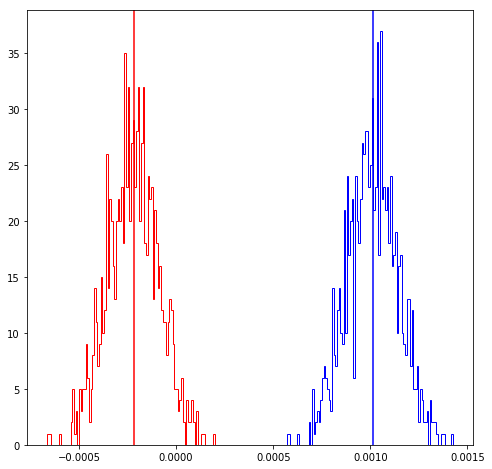

In [106]:
plt.figure(figsize=(8,8))
plt.hist(results[0], bins=100, color='r', histtype='step');
plt.hist(results[1], bins=100, color='b', histtype='step');
plt.axvline(wmean1, c='r')
plt.axvline(wmean2, c='b')



In [119]:
#calculate their errors 
errs_iso = weights.get_errors(orig_ids, [scat1, scat2], weights.wmean, N=1000, args=['1', 'iso', 'component'])

In [120]:
errs_iso

[0.00013857713, 0.0001386957]

### blending on

In [108]:
wmean1 = weights.wmean(orig_ids, scat1, '1', 'grp', 'component') #component by default 
wmean2 = weights.wmean(orig_ids, scat2, '1', 'grp', 'component') #component by default 

In [107]:
results_grp = weights.boots_fnc(orig_ids, [scat1,scat2] , weights.wmean, N=1000, args=['1', 'grp', 'component'])

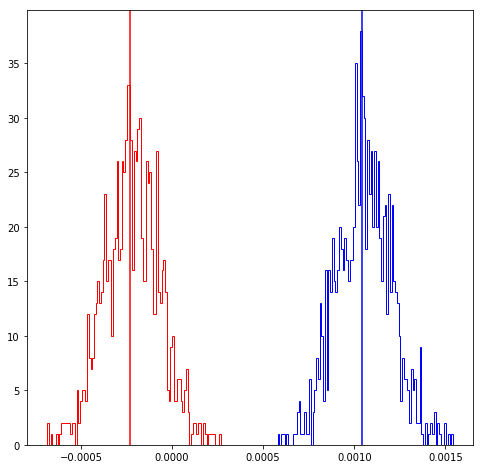

In [110]:
plt.figure(figsize=(8,8))
plt.hist(results_grp[0], bins=100, color='r', histtype='step');
plt.hist(results_grp[1], bins=100, color='b', histtype='step');
plt.axvline(wmean1, c='r')
plt.axvline(wmean2, c='b')




In [118]:
errs_grp = weights.get_errors(orig_ids, [scat1, scat2], weights.wmean, N=1000, args=['1', 'grp', 'component'])

In [121]:
errs_grp

[0.00014415626, 0.00014399478]

# Plot everything together

## preparation and functions

In [21]:
ps = np.linspace(0, 0.5, 51)

In [22]:
# def prepare_means(orig_ids,ps, scat1, scat2, param, iso_or_grp ):
#     means1 = [] 
#     errors1 = [] 
#     means2 = [] 
#     errors2 = [] 
#     for p in tqdm(ps): 
#         means1.append(weights.clipped_mean(orig_ids, scat1, param, p))
#         means2.append(weights.clipped_mean(orig_ids, scat2, param, p))
#         errors_p = weights.get_errors(orig_ids, [scat1,scat2], clipped_mean, N=1000, args=[param,p])
#         errors1_iso.append(errors_p[0])
#         errors2_iso.append(errors_p[1])
        

#     wmean1 = weights.wmean(orig_ids, scat1, '1', iso_or_grp, 'component')
#     wmean2 =  weights.wmean(orig_ids, scat2, '1', iso_or_grp, 'component')

#     wmean1_error_iso,wmean2_error_iso = get_errors(orig_ids, [scat1,scat2], wmean, N=1000, args=['1',iso_or_grp,'component'])
# #     #print results. 
# #     print()
# #     print(wmean1_iso, wmean1_mag_iso, wmean2_iso, wmean2_mag_iso)
# #     print(wmean1_error, wmean1_mag_error, wmean2_error,  wmean2_mag_error)

# def quantile_summary(ps, means1, means2, errors1, errors2, wmean1, wmean2, wmean1_error, wmean2_error, legend_size=10,labels_wmean=['']*4): 
#     plt.figure(figsize=(12,12))
    

#     for p, mean in zip(ps, means1): 
#         if mean > 0:
#             plt.plot(p, mean, 'ro', markersize=8)
#         else: 
#             plt.plot(p, np.absolute(mean), "o", markerfacecolor='None', color='r', markersize=8)



#     for p, mean in zip(ps, means2): 
#         if mean > 0:
#             plt.plot(p, mean, 'bo', markersize=8)
#         else: 
#             plt.plot(p, np.absolute(mean), "o", markerfacecolor='None', color='b', markersize=8)
            
    
#     red_dot_fill, = plt.plot([], [], 'ro')
#     red_dot_nofill, = plt.plot([], [], "o", markerfacecolor='None', color='r')
#     blue_dot, = plt.plot([],[], 'bo')
#     blue_dot_nofill,  = plt.plot([],[], "o", markerfacecolor='None', color='b', markersize=8)
#     red_diamonds, = plt.plot(ps, errors1, 'r+', label= 'error of mean g=0')
#     blue_diamonds, = plt.plot(ps, errors2, 'bx', label= 'error of means g=0.02')
    

#     red_line = plt.axhline(np.absolute(wmean1), c='r')
#     red_line_dashed = plt.axhline(wmean1_error, c='r', linestyle='--')

#     red_dashdot = plt.axhline(np.absolute(wmean1_mag), c='r', linestyle='dashdot')
#     red_line_dotted = plt.axhline(wmean1_mag_error, c='r', linestyle='dotted')


#     blue_line = plt.axhline(np.absolute(wmean2), c='b')
#     blue_line_dashed = plt.axhline(wmean2_error, c='b', linestyle='--')

#     blue_line_dashdot = plt.axhline(np.absolute(wmean2_mag), c='b', linestyle='dashdot')
#     blue_line_dotted = plt.axhline(wmean2_mag_error, c='b', linestyle='dotted')

#     plt.legend([red_dot_fill, red_dot_nofill, red_diamonds, 
#                 red_line, red_line_dashed, red_dashdot, red_line_dotted, 
#                 blue_dot, blue_dot_nofill, blue_diamonds, 
#                 blue_line, blue_line_dashed], 
#                ["Means zero shear (positive)", "Means zero shear (negative)", "corresponding error", 
#                 f"Weighted mean zero shear ({labels_wmean[0]})", "corresponding error", 
#                 f"Weighted mean,g=0, sn magnitude ({labels_wmean[1]})", "corresponding error",
#                 "Means g=0.02 (positive)",  "Means g=0.02 (negative)",  "Errors on mean g=0.02", 
#                 f"weighted mean g=0.02 ({labels_wmean[2]})", "corresponding error", 
#                 f"weighted mean,g=0.02, sn magnitude ({labels_wmean[3]})", "corresponding error"
#                ], loc='best', prop={"size":legend_size}, bbox_to_anchor=(1,1))
    
#     plt.xlabel('quantile', size=22)
#     plt.xticks(size=18)
#     plt.yticks(size=18)
#     plt.yscale('log')
    

In [23]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple


def prepare_means_errors(ps, scat1, scat2, clipped_mean, args=[]):
    """
    clipped_mean is a function that takes in a dbt, p
    clipped_mean_fnc is a function that only takes in p. 
    """
    
    orig_ids = list(range(len(scat1)))
    assert orig_ids == list(range(len(scat2)))
        
    means1 = [] 
    errors1 = [] 
    means2 = [] 
    errors2 = [] 
    
    for p in tqdm(ps): 
        nargs = [p] + args
        means1.append(clipped_mean(orig_ids, scat1, *nargs))
        means2.append(clipped_mean(orig_ids, scat2, *nargs))
        errs = weights.get_errors(orig_ids, [scat1,scat2], clipped_mean, N=1000, args=nargs)
        errors1.append(errs[0])
        errors2.append(errs[1])
        
    return means1,errors1,means2,errors2

def plot_negpos(ps, vals, marker_pos, kwargs_pos, marker_neg, kwargs_neg): 
    for p, val in zip(ps, vals):
        if val > 0: 
            plt.plot(p, val, marker_pos, **kwargs_pos)
        else: 
            plt.plot(p, np.absolute(val), marker_neg, **kwargs_neg)
            
def add_custom_legend():
    import matplotlib.lines as mlines

    empty, = plt.plot([], [], 'wo', markersize=7)



    blue_dot, = plt.plot([], [], 'bo', markersize=7)
    blue_dot_nofill, = plt.plot([], [], "o", markerfacecolor='None', color='b', markersize=7)
    red_dot, = plt.plot([],[], 'ro', markersize=7)
    red_dot_nofill,  = plt.plot([],[], "o", markerfacecolor='None', color='r', markersize=7)
    red_plus, = plt.plot([],[], "r+", markersize=7)
    blue_cross, = plt.plot([],[], "bx", markersize=7)

    red_line, = plt.plot([],[], 'r-')
    blue_line, = plt.plot([],[], 'b-')

    dotted_line, = plt.plot([],[], 'k-.')

    legend_artists = [empty, empty, (red_dot, blue_dot ), (red_dot_nofill, blue_dot_nofill), 
                      (red_plus, blue_cross), red_line, blue_line, 
                      dotted_line ]
    legend_labels = ["Red: g = 0.0", "Blue: g = 0.02", "Mean > 0", "Mean < 0", "Error on mean", "Weighted mean < 0", 
                     "Weighted mean > 0", "Error on weighted mean"]
    leg = plt.legend(legend_artists, legend_labels, loc='lower left', numpoints=1,
                   handler_map={tuple: HandlerTuple(ndivide=None)})

    for i,text in enumerate(leg.get_texts()):

        if i==0: 
            plt.setp(text, color = 'r')
        elif i==1: 
            plt.setp(text, color = 'b')
        else: 
            break



            

In [24]:
def plot_clipped_means(ps, means1, errors1, means2, errors2, wmean1, error_wmean1,
                       wmean2, error_wmean2, ylims=None):
    
    plt.figure(figsize=(8,8))

    #plot errors
    plt.plot(ps, errors1, 'r+', markersize=8, label= 'error of mean g=0')
    plt.plot(ps, errors2, 'bx', markersize=8, label= 'error of means g=0.02')
    
    #plot the means. 
    plot_negpos(ps, means1, 'ro', {'markersize':8}, 'o', dict(markerfacecolor='None', color='r', markersize=8))
    plot_negpos(ps, means2, 'bo', {'markersize':8}, 'o', dict(markerfacecolor='None', color='b', markersize=8))
    
    #plot weighted means and errors 
    plt.axhline(np.absolute(wmean1), color='r') #negative. 
    plt.axhline(error_wmean1, color='r', linestyle='-.')

    plt.axhline(wmean2, color='b')
    plt.axhline(error_wmean2, color='b', linestyle='-.')

    
    #add legends. 
    add_custom_legend()

    plt.xlabel('quantile', size=20)
    plt.yscale('log')

    plt.ylim(ylims)

## results

In [25]:
orig_ids= list(range(len(scat1)))

In [ ]:
means1, errors1, means2, errors2 = prepare_means_errors(ps, scat1, scat2, weights.clipped_mean, args=['bias_g1'])

In [ ]:
means1_grp, errors1_grp, means2_grp, errors2_grp = prepare_means_errors(ps, scat1, scat2, weights.clipped_mean, args=['bias_g1_grp'])

 39%|███▉      | 20/51 [07:14<19:03, 36.89s/it]

In [ ]:
wmean1 = weights.wmean(orig_ids, scat1, '1', 'iso', 'component')
wmean2 = weights.wmean(orig_ids, scat2, '1', 'iso', 'component')

wmean1_grp = weights.wmean(orig_ids, scat1, '1', 'grp', 'component')
wmean2_grp = weights.wmean(orig_ids, scat2, '1', 'grp', 'component')

In [ ]:
errs_iso = weights.get_errors(orig_ids, [scat1, scat2], weights.wmean, N=1000, args=['1', 'iso', 'component'])
error_wmean1, error_wmean2 = errs_iso

errs_grp = weights.get_errors(orig_ids, [scat1, scat2], weights.wmean, N=1000, args=['1', 'grp', 'component'])
error_wmean1_grp, error_wmean2_grp = errs_grp

In [ ]:
#clipped weighted mean. 
means1, errors1, means2, errors2 = prepare_means_errors(ps, scat1, scat2, weights.clipped_weighted_mean, args=['bias_g1', '1', 'iso', 'component'])
means1_grp, errors1_grp, means2_grp, errors2_grp = prepare_means_errors(ps, scat1, scat2, weights.clipped_weighted_mean, args=['bias_g1_grp', '1', 'grp', 'component'])

## plot all (selected criteria)

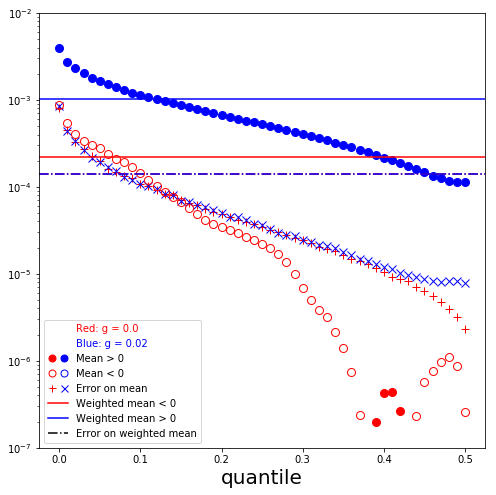

In [41]:
plot_clipped_means(ps, means1, errors1, means2, errors2, wmean1, error_wmean1, wmean2, 
                   error_wmean2, ylims=[1e-7,1e-2])

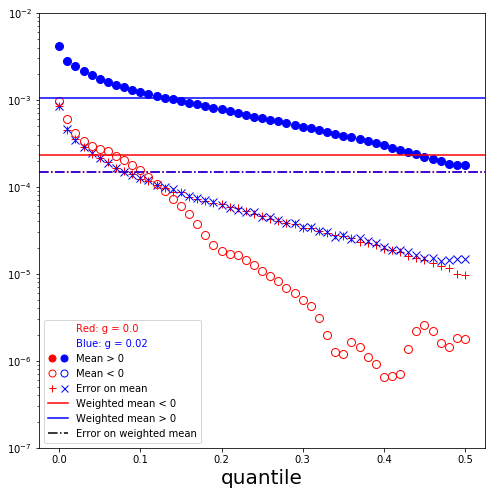

In [44]:
plot_clipped_means(ps, means1_grp, errors1_grp, means2_grp, errors2_grp, wmean1_grp, error_wmean1_grp, 
                   wmean2_grp, error_wmean2_grp, ylims=[1e-7,1e-2])

In [ ]:
#plot only the ones with applied shear. 
plot_clipped_means(ps, means2, errors2, means2_grp, errors2_grp, wmean2, error_wmean2, 
                   wmean2_grp, error_wmean2_grp, ylims=[1e-7,1e-2])

## plot isolated 

In [51]:
temp1 = scat1[scat1['grp_size']==1]
temp2 = scat2[scat2['grp_size']==1]

In [52]:
orig_ids1 = list(range(len(temp1)))
orig_ids2 = list(range(len(temp2)))

In [53]:
means1_1, errors1_1, means2_1, errors2_1 = prepare_means_errors(ps, 'bias_g1', temp1, temp2)
means1_grp_1, errors1_grp_1, means2_grp_1, errors2_grp_1 = prepare_means_errors(ps, 'bias_g1_grp', temp1, temp2) 

100%|██████████| 51/51 [02:06<00:00,  2.08s/it]


In [56]:
wmean1 = weights.wmean(orig_ids1, temp1, '1', 'iso', 'component')
wmean2 = weights.wmean(orig_ids2, temp2, '1', 'iso', 'component')
wmean1_grp = weights.wmean(orig_ids1, temp1, '1', 'grp', 'component')
wmean2_grp = weights.wmean(orig_ids2, temp2, '1', 'grp', 'component')

error_wmean1=weights.get_errors(orig_ids1, [temp1], weights.wmean, N=1000, args=['1', 'iso', 'component'])[0]
error_wmean2=weights.get_errors(orig_ids2, [temp2], weights.wmean, N=1000, args=['1', 'iso', 'component'])[0]

error_wmean1_grp=weights.get_errors(orig_ids1, [temp1], weights.wmean, N=1000, args=['1', 'grp', 'component'])[0]
error_wmean2_grp=weights.get_errors(orig_ids2, [temp2], weights.wmean, N=1000, args=['1', 'grp', 'component'])[0]

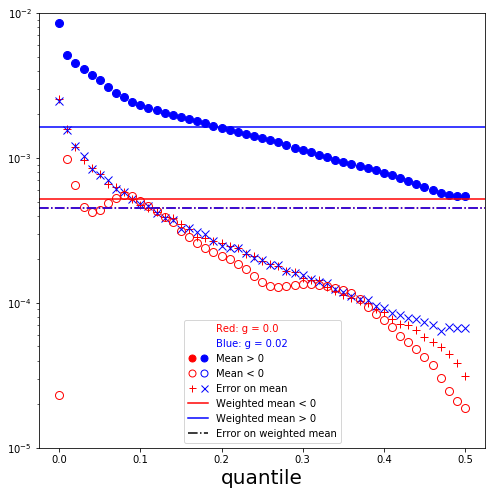

In [60]:
plot_clipped_means(ps, means1_1, errors1_1, means2_1, errors2_1, wmean1, error_wmean1, wmean2, 
                   error_wmean2, ylims=[1e-5,1e-2])

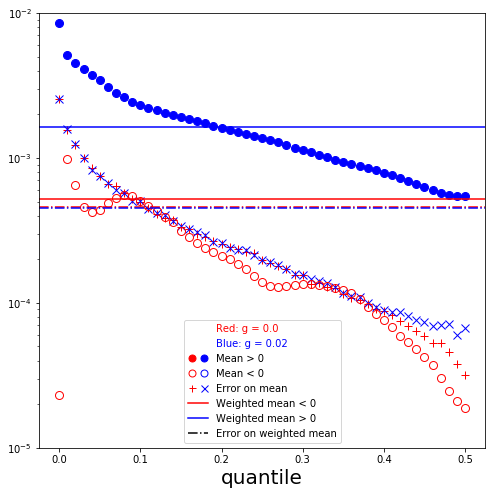

In [62]:
plot_clipped_means(ps, means1_grp_1, errors1_grp_1, means2_grp_1, errors2_grp_1, wmean1_grp, error_wmean1_grp,
                   wmean2_grp, error_wmean2_grp, ylims=[1e-5,1e-2])

## plot blended ones

In [66]:
temp1 = scat1[scat1['grp_size']>1]
temp2 = scat2[scat2['grp_size']>1]

In [67]:
means1_2, errors1_2, means2_2, errors2_2 = prepare_means_errors(ps, 'bias_g1', temp1, temp2)
means1_grp_2, errors1_grp_2, means2_grp_2, errors2_grp_2 = prepare_means_errors(ps, 'bias_g1_grp', temp1, temp2) 


100%|██████████| 51/51 [05:36<00:00,  5.53s/it]

In [72]:
orig_ids1 = list(range(len(temp1)))
orig_ids2 = list(range(len(temp2)))

In [69]:
wmean1 = weights.wmean(orig_ids1, temp1, '1', 'iso', 'component')
wmean2 = weights.wmean(orig_ids2, temp2, '1', 'iso', 'component')
wmean1_grp = weights.wmean(orig_ids1, temp1, '1', 'grp', 'component')
wmean2_grp = weights.wmean(orig_ids2, temp2, '1', 'grp', 'component')

error_wmean1=weights.get_errors(orig_ids1, [temp1], weights.wmean, N=1000, args=['1', 'iso', 'component'])[0]
error_wmean2=weights.get_errors(orig_ids2, [temp2], weights.wmean, N=1000, args=['1', 'iso', 'component'])[0]

error_wmean1_grp=weights.get_errors(orig_ids1, [temp1], weights.wmean, N=1000, args=['1', 'grp', 'component'])[0]
error_wmean2_grp=weights.get_errors(orig_ids2, [temp2], weights.wmean, N=1000, args=['1', 'grp', 'component'])[0]

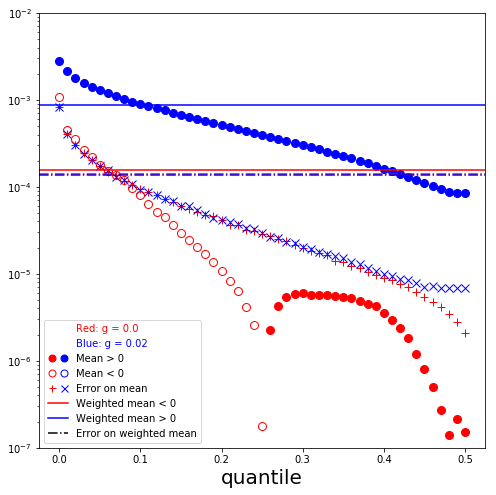

In [79]:
plot_clipped_means(ps, means1_2, errors1_2, means2_2, errors2_2, wmean1, error_wmean1, wmean2, 
                   error_wmean2, ylims=[1e-7,1e-2])

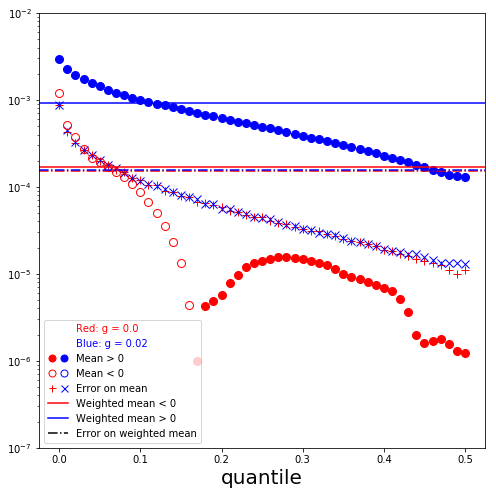

In [80]:
plot_clipped_means(ps, means1_grp_2, errors1_grp_2, means2_grp_2, errors2_grp_2, wmean1_grp, error_wmean1_grp, 
                   wmean2_grp, error_wmean2_grp, ylims=[1e-7,1e-2])

## Plot weighted clipped mean 

In [47]:
orig_ids = list(range(len(scat2)))

In [54]:
weights.clipped_weighted_mean(orig_ids, scat2, 0.2, 'bias_g1', '1', 'iso', 'component')

0.00054241536

In [53]:
weights.median_fnc(orig_ids, scat2, '1', 'iso')

0.00011347063

In [50]:
weights.wmean(orig_ids, scat2, '1', 'iso', 'component')

0.0010134417

# Triangle plots of biases

## blending off 

In [44]:
import corner 
reload(corner)

<module 'corner' from '/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/miniconda3/envs/igalsim/lib/python3.7/site-packages/corner/__init__.py'>

In [53]:
params = ['bias_f', 'bias_s', 'bias_x', 'bias_y', 'bias_g1', 'bias_g2']

biases = np.array([list(scat1[param]) for param in params]).T

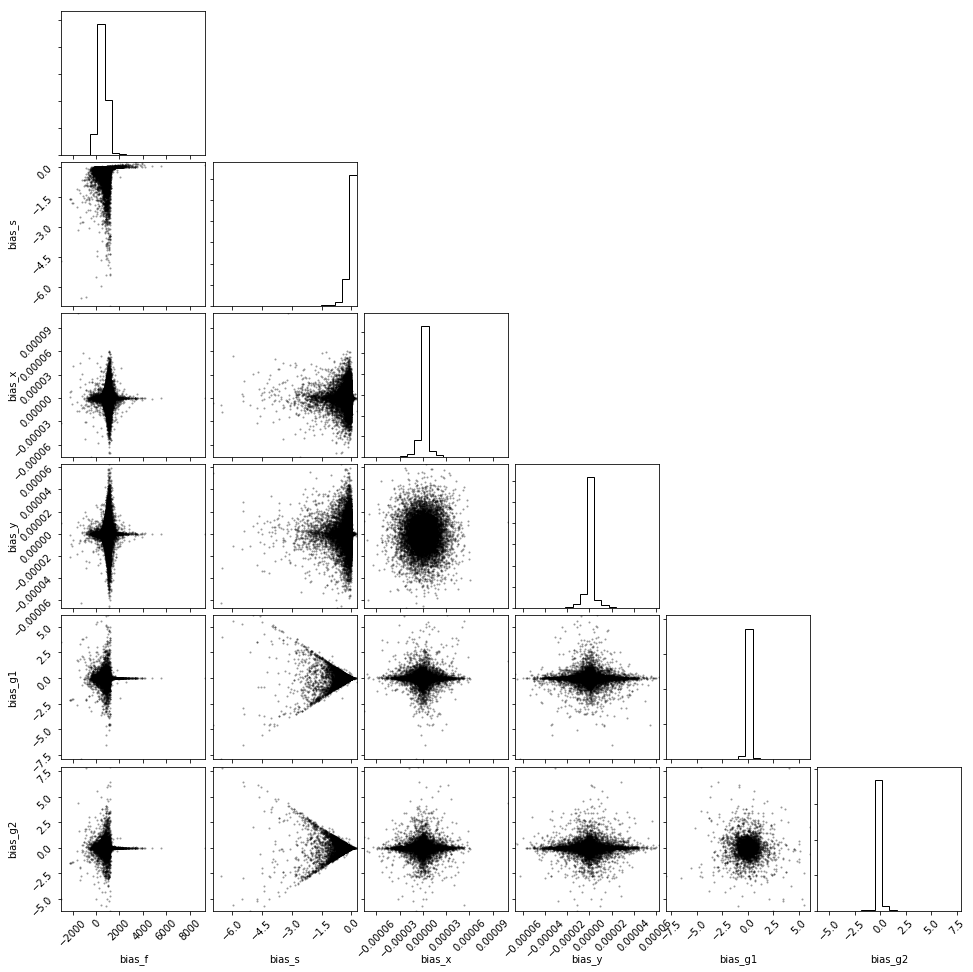

In [60]:
hist2d_kwargs = {'plot_datapoints':True,'plot_density':False,'plot_contours':False, 'quiet':True, 
                     'no_fill_contours':False,'fill_contours':False, 'data_kwargs': {'alpha':0.4, #'markevery':4
                                                                                    }}
figure = corner.corner(biases, labels=params, title_kwargs={"size": 30}, max_n_ticks=7, **hist2d_kwargs);
# figure.savefig(os.path.join("data", 'ntriangle1.pdf'))



## blending on 

In [27]:
params_grp = [param+'_grp' for param in params]
biases_grp = np.array([list(scat1[param]) for param in params_grp]).T

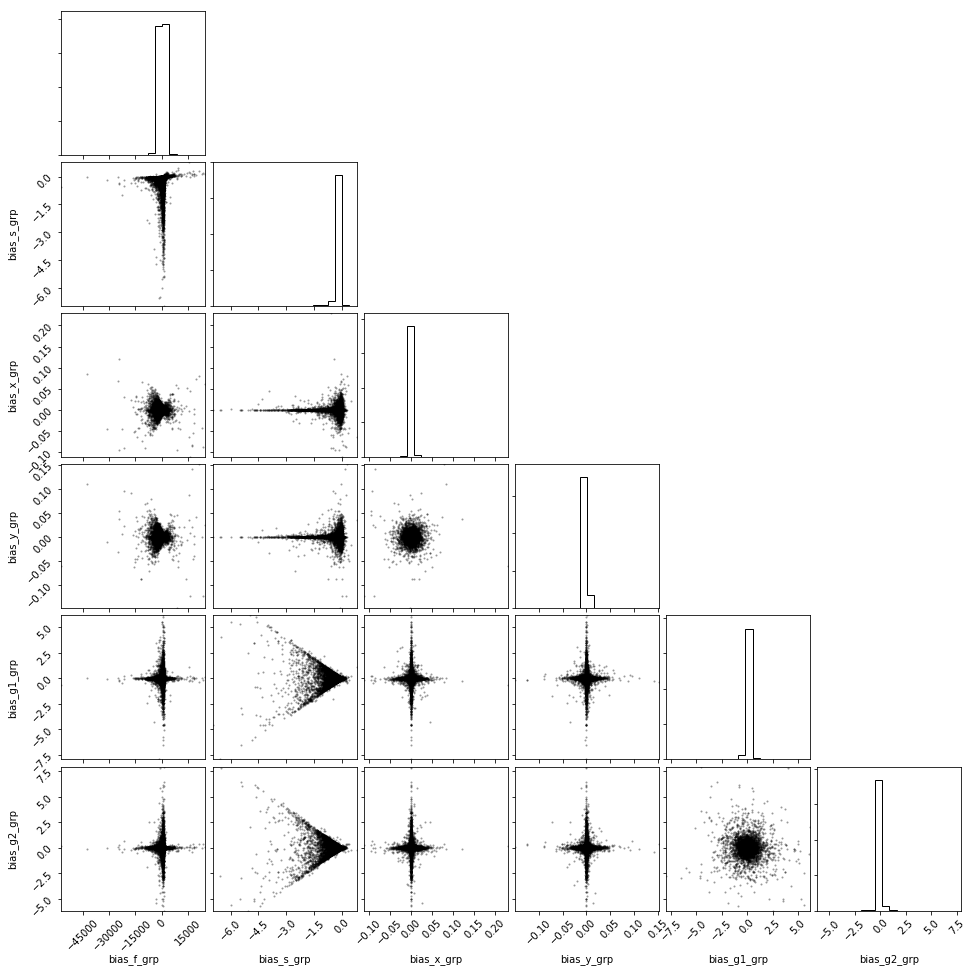

In [28]:
hist2d_kwargs = {'plot_datapoints':True,'plot_density':False,'plot_contours':False, 'quiet':True, 
                     'no_fill_contours':False,'fill_contours':False, 'data_kwargs': {'alpha':0.4, #'markevery':4
                                                                                    }}
figure = corner.corner(biases_grp, labels=params_grp, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);
# figure.savefig(os.path.join("data", 'ntriangle1.pdf'))




## bulge, and bulge+disk separately

In [39]:
params = ['bias_f', 'bias_s', 'bias_x', 'bias_y', 'bias_g1', 'bias_g2']
params_grp = [param+'_grp' for param in params]
hist2d_kwargs = {'plot_datapoints':True,'plot_density':False,'plot_contours':False, 'quiet':True, 
                     'no_fill_contours':False,'fill_contours':False, 'data_kwargs': {'alpha':0.4}}

In [32]:

biases = np.array([list(scat1[scat1['f_disk']==1][param]) for param in params]).T
biases_grp = np.array([list(scat1[scat1['f_disk']==1][param]) for param in params_grp]).T

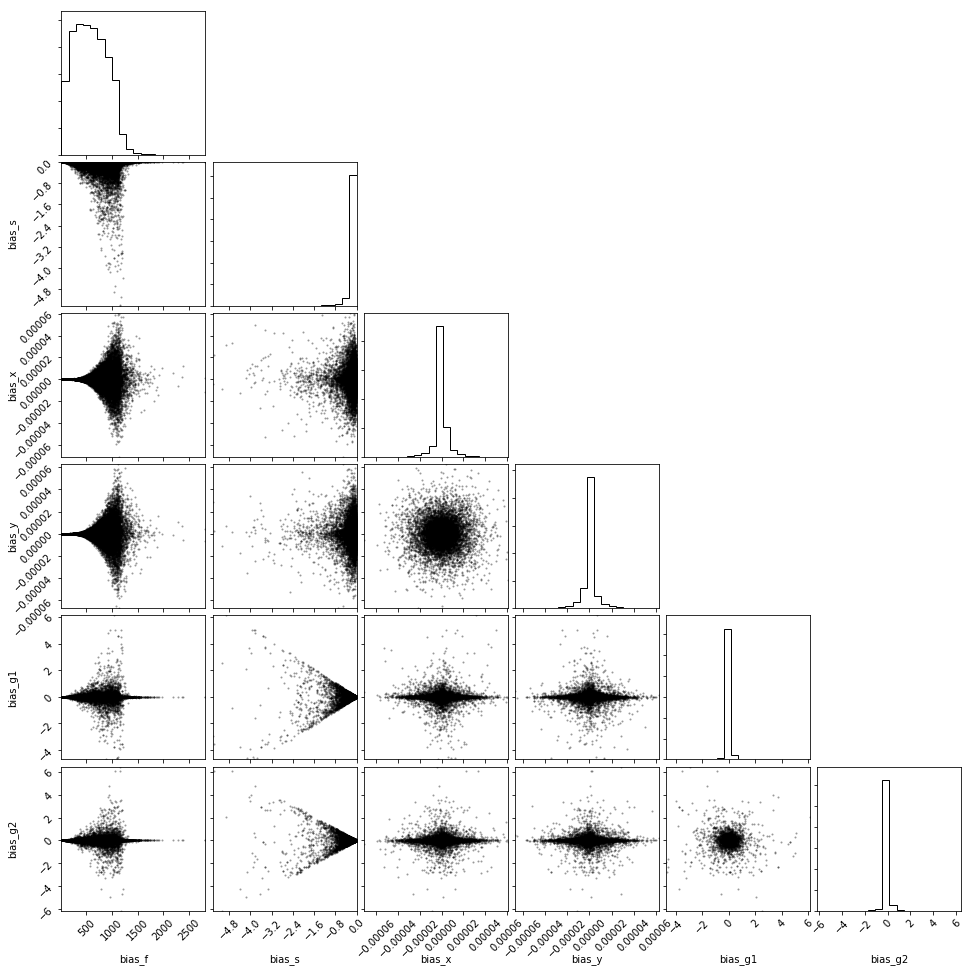

<Figure size 432x288 with 0 Axes>

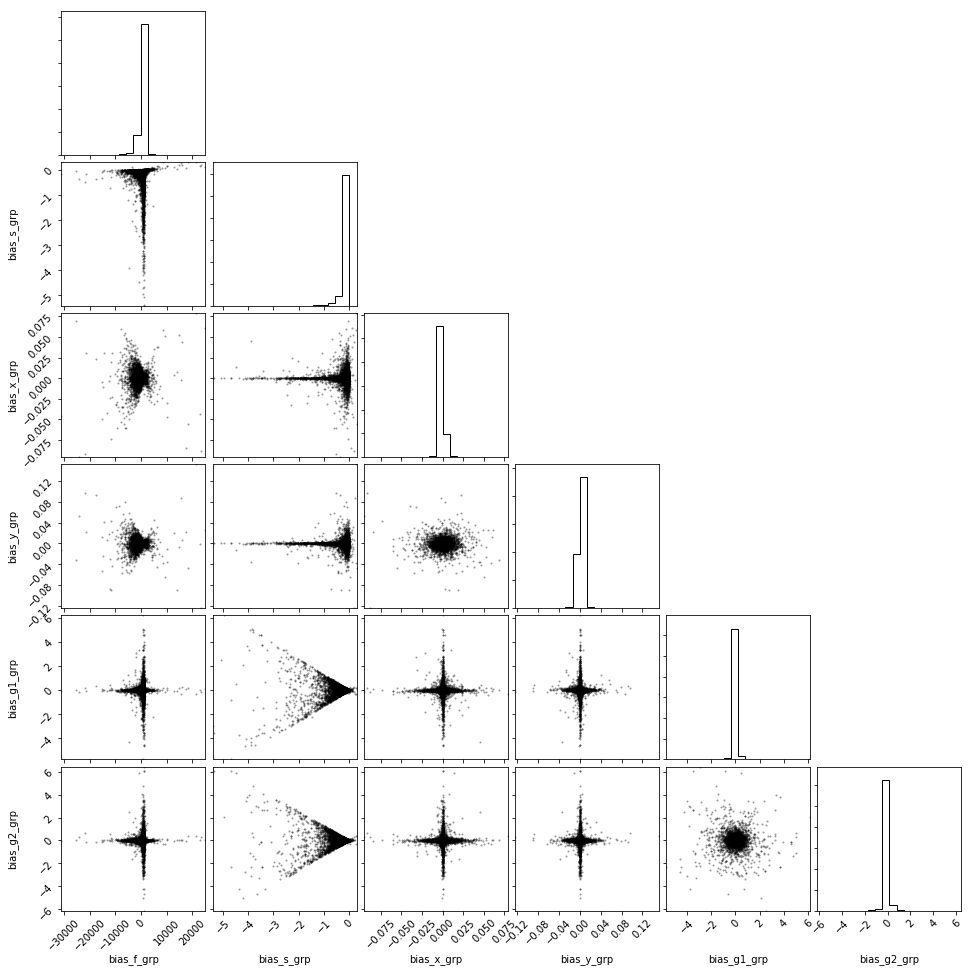

In [33]:
#all disk. 

#blending off, then on. 
figure = corner.corner(biases, labels=params, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);
plt.figure()
figure = corner.corner(biases_grp, labels=params_grp, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);



In [142]:
#mixed

biases = np.array([list(scat1[scat1['f_disk']<1][param]) for param in params]).T
biases_grp = np.array([list(scat1[scat1['f_disk']<1][param]) for param in params_grp]).T

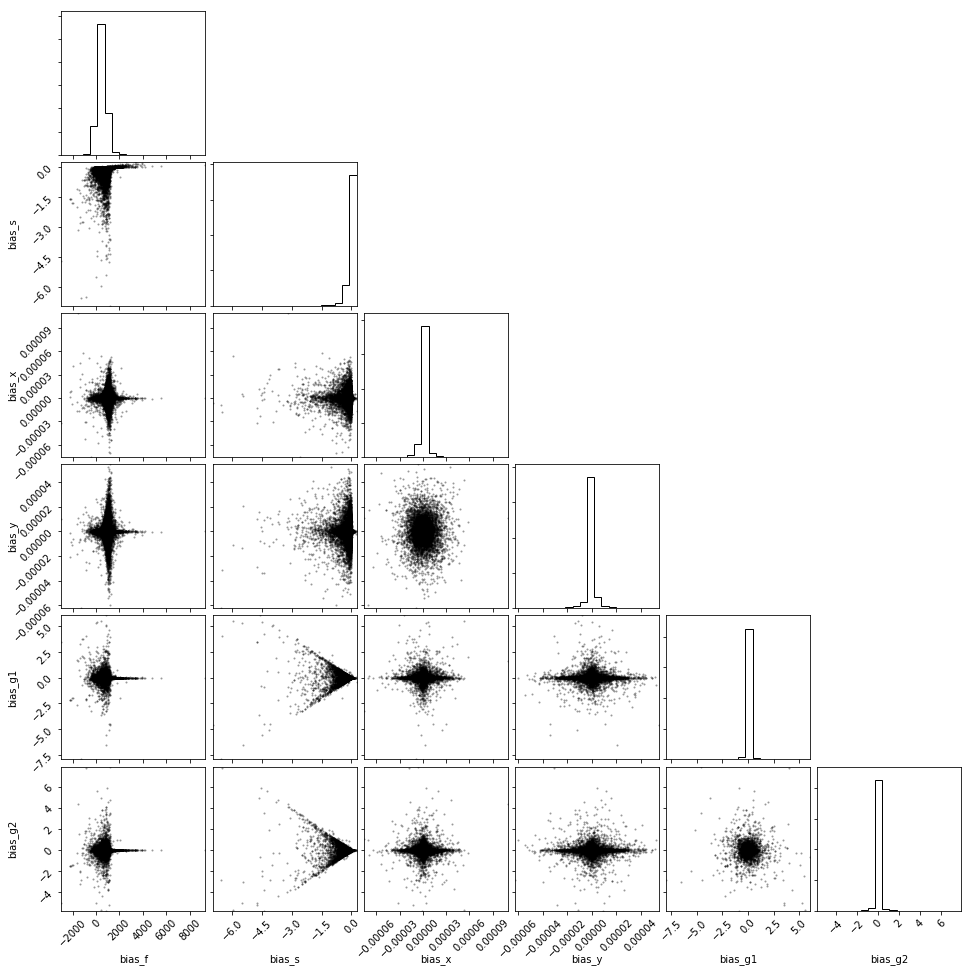

<Figure size 432x288 with 0 Axes>

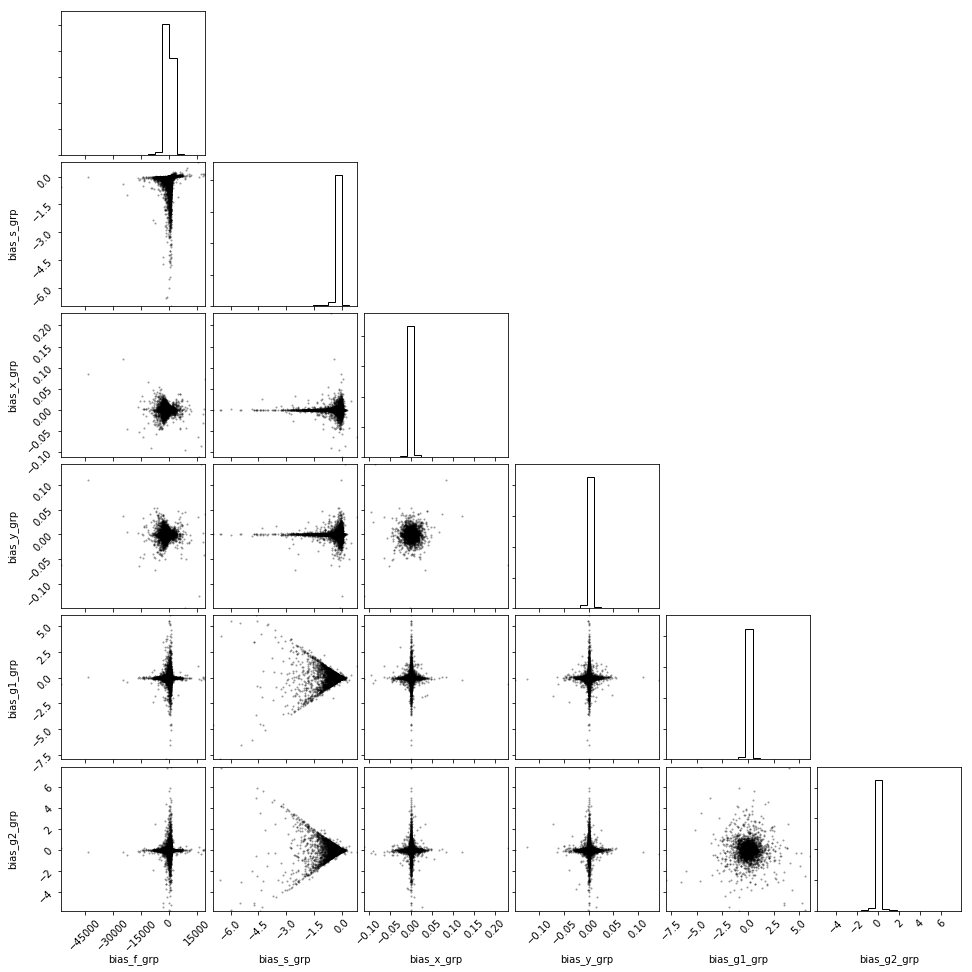

In [143]:
#blending off, then on. 
figure = corner.corner(biases, labels=params, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);
plt.figure()
figure = corner.corner(biases_grp, labels=params_grp, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);




In [42]:
#mixed

biases = np.array([list(scat1[scat1['f_disk']==0][param]) for param in params]).T
biases_grp = np.array([list(scat1[scat1['f_disk']==0][param]) for param in params_grp]).T

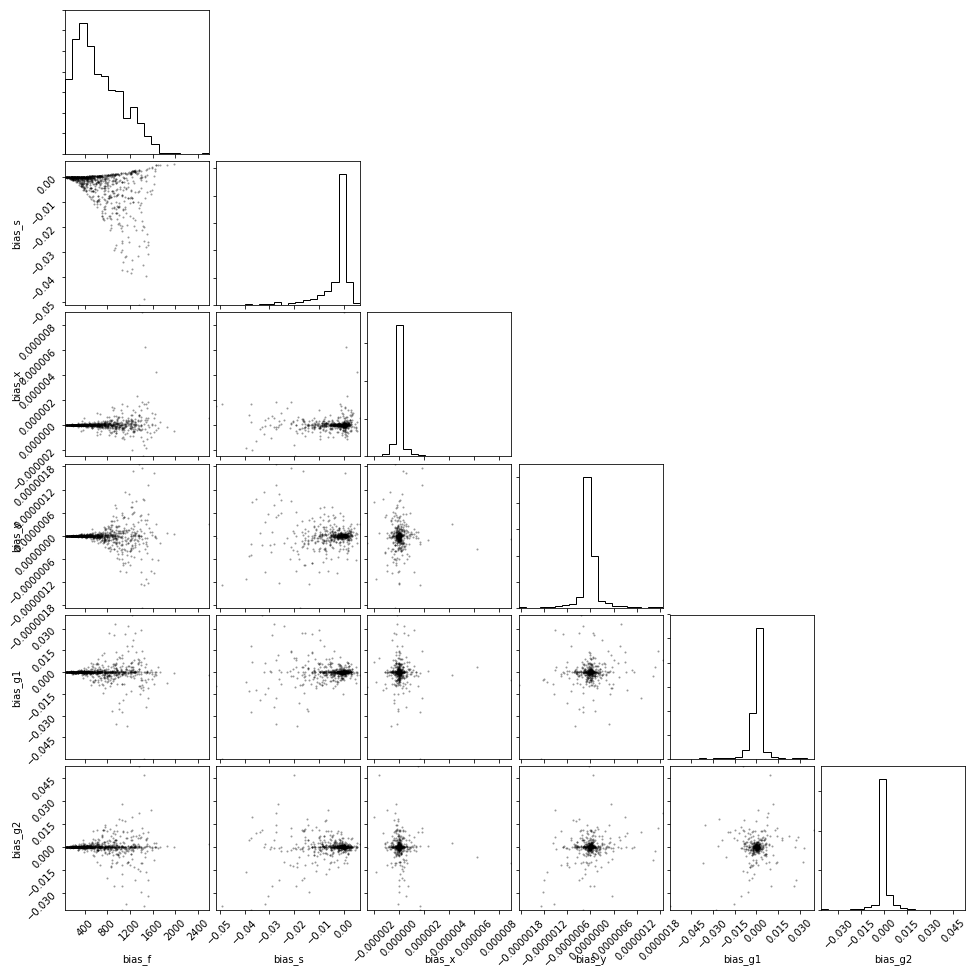

<Figure size 432x288 with 0 Axes>

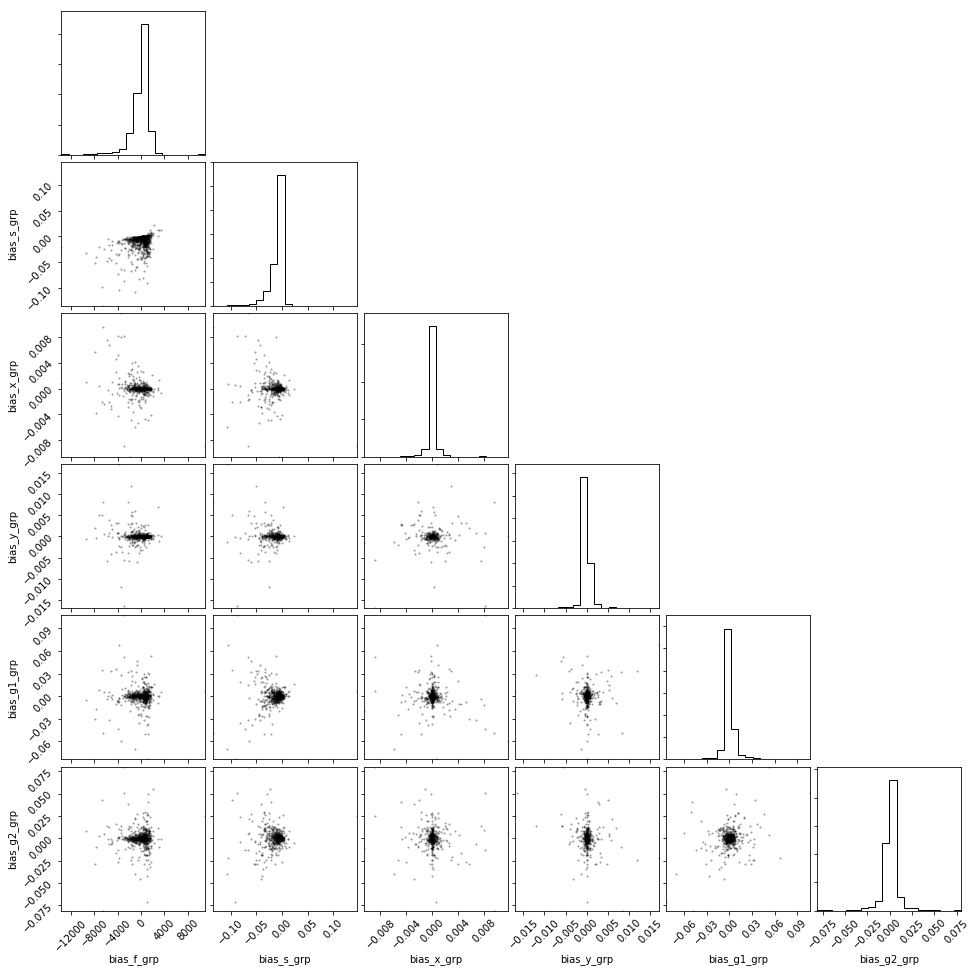

In [45]:
#blending off, then on. 
figure = corner.corner(biases, labels=params, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);
plt.figure()
figure = corner.corner(biases_grp, labels=params_grp, title_kwargs={"fontsize": 12}, max_n_ticks=7, **hist2d_kwargs);





# Money Plot 


## test 

In [17]:
g1s = [-0.02, -0.015, -0.1, -0.005, 0, 0.005, 0.01, 0.015, .02]
orig_ids = list(range(len(scats[0])))
args_iso=['1', 'iso']
args_grp=['1', 'grp']

In [18]:
fnc=weights.median_fnc

In [20]:
values = [fnc(orig_ids, cat, *args_iso) for cat in scats]
values_grp = [fnc(orig_ids, cat, *args_grp) for cat in scats]

In [27]:
covs = money.get_boostrap_covariance_matrix(orig_ids, scats, weights.median_fnc, N=1000, 
                                     args_iso=args_iso, args_grp=args_grp)

In [28]:
cov, cov_grp, corr, corr_grp = covs
inv, inv_grp = np.linalg.inv(cov), np.linalg.inv(cov_grp)

In [34]:
model = money.linear_f
fit_procedure = money.chi_sq_fit
beta0, beta1,beta0_err,beta1_err,beta01_corr = fit_procedure(g1s, values, inv, model )
beta0_grp, beta1_grp,beta0_err_grp,beta1_err_grp,beta01_corr_grp = fit_procedure(g1s, values_grp, inv_grp, model)


1.844545388079653e-06

## Consistency with old medians? 

[112938, 112938, 112938, 112938, 112938, 112938, 112938, 112938, 112938]


In [34]:
g1s = np.array([-0.02, -0.015, -0.01, -0.005, 0, 0.005, 0.01, 0.015, 0.02])
orig_ids = list(range(len(pscats[0])))

In [35]:
pmedian_prep = money.prepare_money_plot(g1s, orig_ids, pscats, weights.median_fnc, fit_procedure=money.chi_sq_fit, 
                         N=int(1e3), model=money.linear_f, args_iso=['1', 'iso'], args_grp=['1', 'grp'])

In [36]:
betas, (values, values_grp), (cov, cov_grp, corr, corr_grp), (errs, errs_grp), (boot_values, boot_values_grp) = pmedian_prep

Results for fits of unblended case: 


 value b0:     1.471e-03
error b0:     4.374e-05
value b1:     3.230e-07
error b1:     1.147e-07
error correlation coefficient: 1.771e-01

Results for fits of blended case: 


 value b0:     3.554e-03
error b0:     9.038e-05
value b1:     -2.893e-06
error b1:     1.619e-06
error correlation coefficient: -6.342e-02


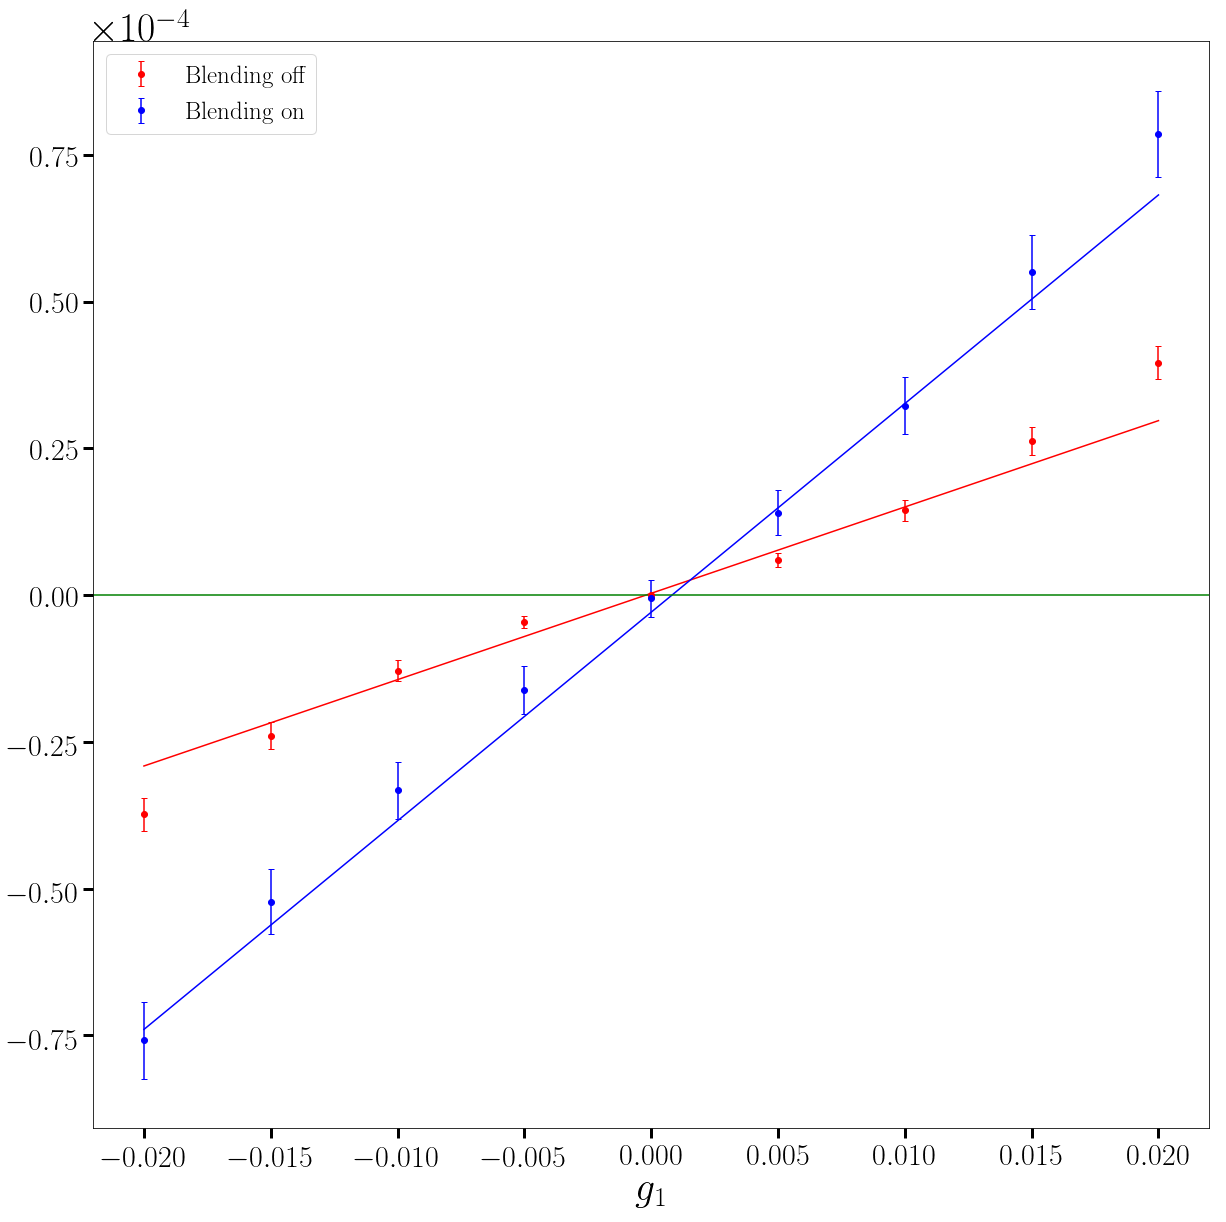

In [37]:
money.make_money_plot(g1s, values, errs, values_grp, errs_grp, betas, ticks1=None, labely1=None)

## medians

In [90]:
g1s = np.array([-0.02, -0.015, -0.01, -0.005, 0, 0.005, 0.01, 0.015, 0.02])
orig_ids = list(range(len(scats[0])))

In [91]:
median_prep = money.prepare_money_plot(g1s, orig_ids, scats, weights.median_fnc, fit_procedure=money.chi_sq_fit, 
                         N=int(1e4), model=money.linear_f, args_iso=['1', 'iso'], args_grp=['1', 'grp'])

In [103]:
betas, (values, values_grp), (cov, cov_grp, corr, corr_grp), (errs, errs_grp), (boot_values, boot_values_grp) = median_prep

### check bootstrapped values 

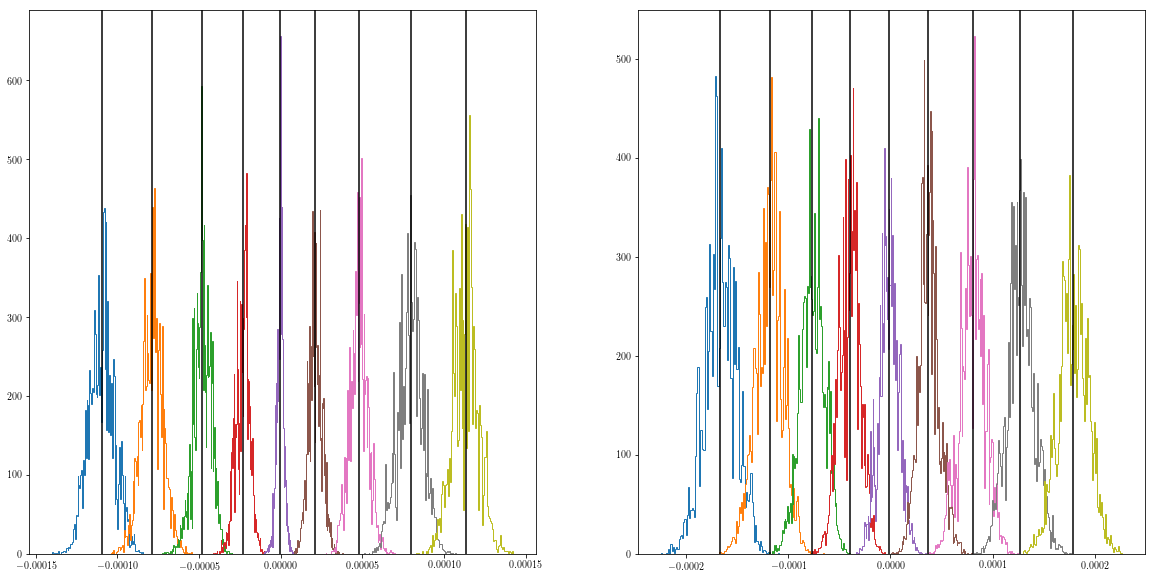

In [104]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(20,10))
ax1,ax2 = axs.flatten()
for val, val_grp, vals, vals_grp  in zip(values, values_grp, boot_values, boot_values_grp): 
    ax1.hist(vals, histtype='step', bins=100)
    ax1.axvline(val,color='k')
    ax2.hist(vals_grp, histtype='step', bins=100)
    ax2.axvline(val_grp, color='k')

### make money plot 

Results for fits of unblended case: 


 value b0:     5.256e-03
error b0:     1.176e-04
value b1:     -1.028e-06
error b1:     8.728e-07
error correlation coefficient: -5.108e-02

Results for fits of blended case: 


 value b0:     8.387e-03
error b0:     1.996e-04
value b1:     -9.593e-06
error b1:     6.159e-06
error correlation coefficient: -5.218e-02


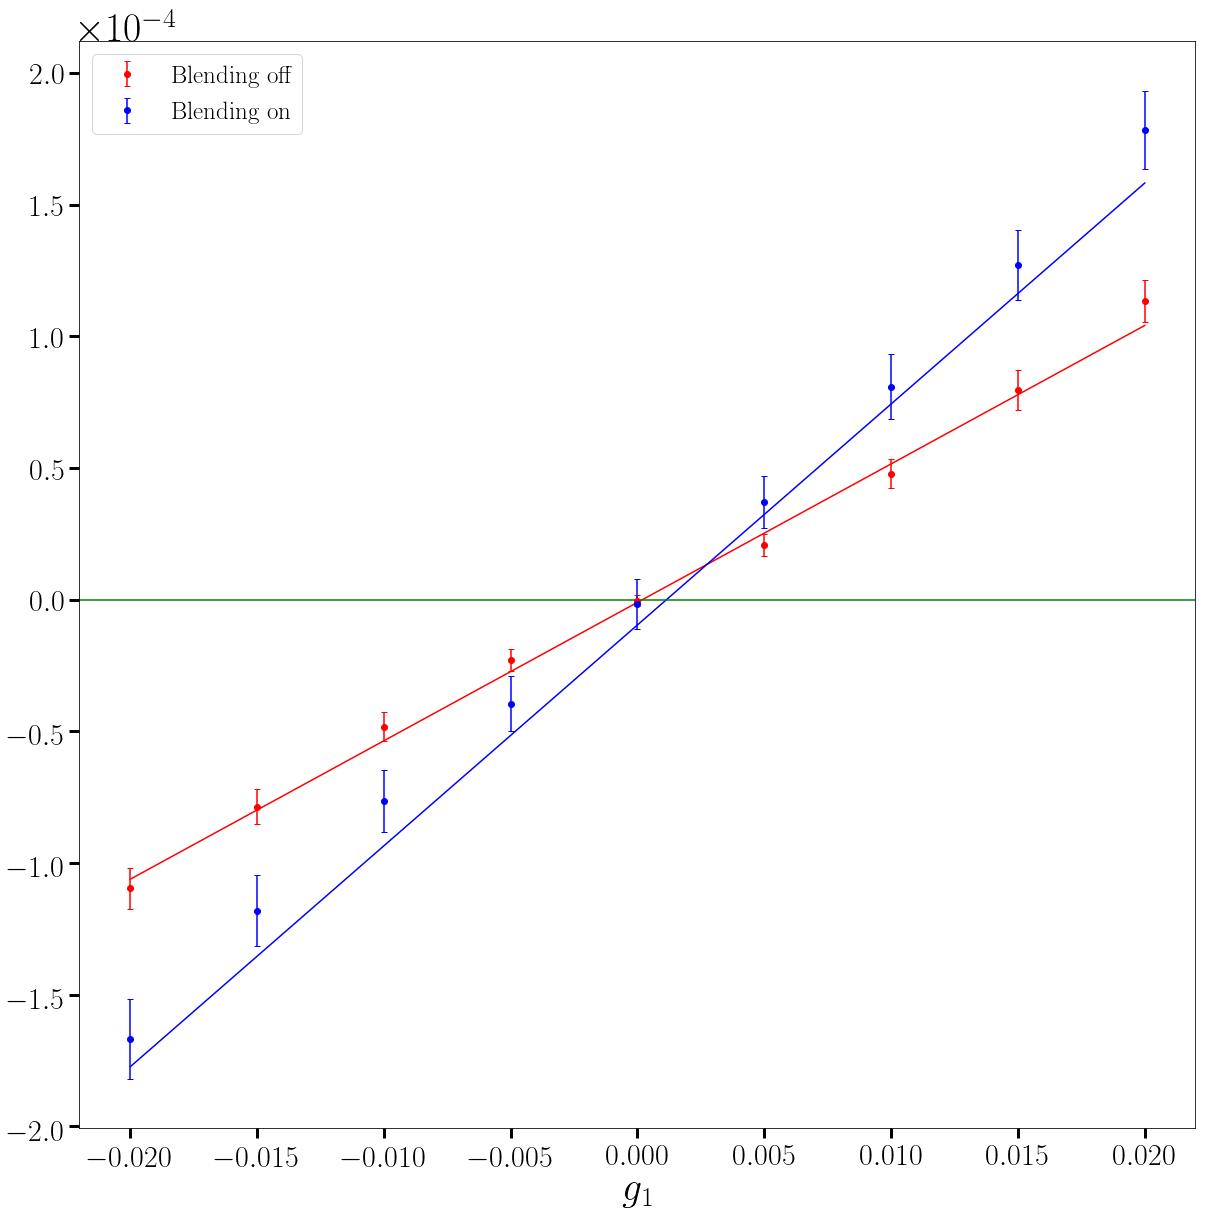

In [105]:
money.make_money_plot(g1s, values, errs, values_grp, errs_grp, betas, ticks1=None, labely1=None)

## weights

In [93]:
g1s = np.array([-0.02, -0.015, -0.01, -0.005, 0, 0.005, 0.01, 0.015, 0.02])
orig_ids = list(range(len(scats[0])))

In [94]:
weights_prep = money.prepare_money_plot(g1s, orig_ids, scats, weights.wmean, fit_procedure=money.chi_sq_fit, 
                                        N=int(1e4), model=money.linear_f, args_iso=['1', 'iso', 'component'], 
                                        args_grp=['1', 'grp', 'component'])

In [106]:
betas, (values, values_grp), (cov, cov_grp, corr, corr_grp), (errs, errs_grp), (boot_values, boot_values_grp) = weights_prep

### check boostraps

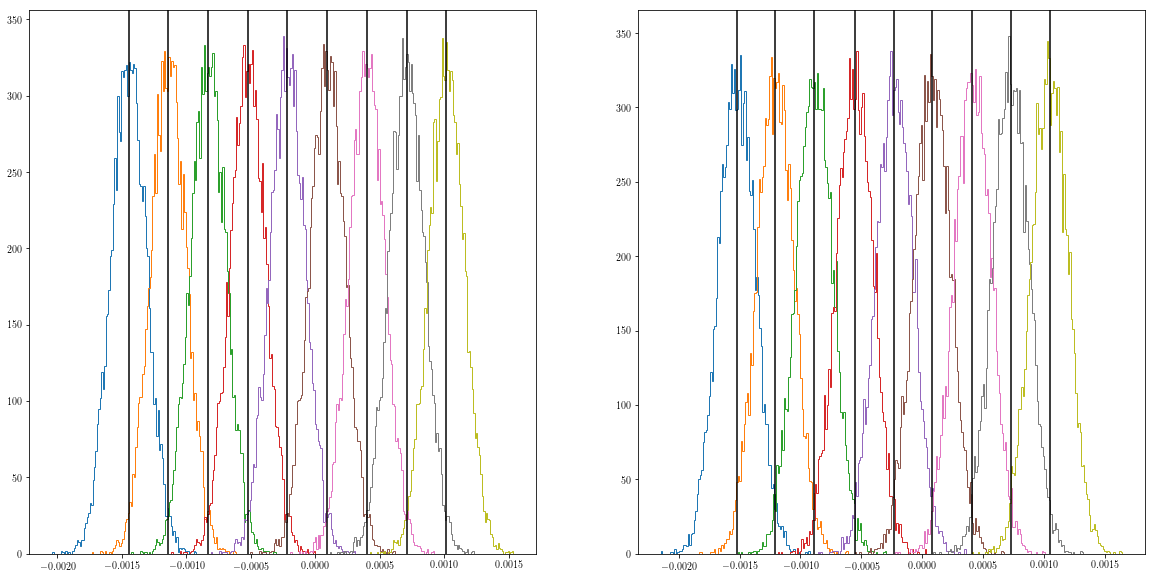

In [107]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(20,10))
ax1,ax2 = axs.flatten()
for val, val_grp, vals, vals_grp  in zip(values, values_grp, boot_values, boot_values_grp): 
    ax1.hist(vals, histtype='step', bins=100)
    ax1.axvline(val,color='k')
    ax2.hist(vals_grp, histtype='step', bins=100)
    ax2.axvline(val_grp, color='k')

### make money plot

Results for fits of unblended case: 


 value b0:     6.162e-02
error b0:     3.851e-04
value b1:     -1.989e-04
error b1:     1.200e-04
error correlation coefficient: -6.274e-03

Results for fits of blended case: 


 value b0:     6.458e-02
error b0:     4.257e-04
value b1:     -2.449e-04
error b1:     1.498e-04
error correlation coefficient: -3.182e-03


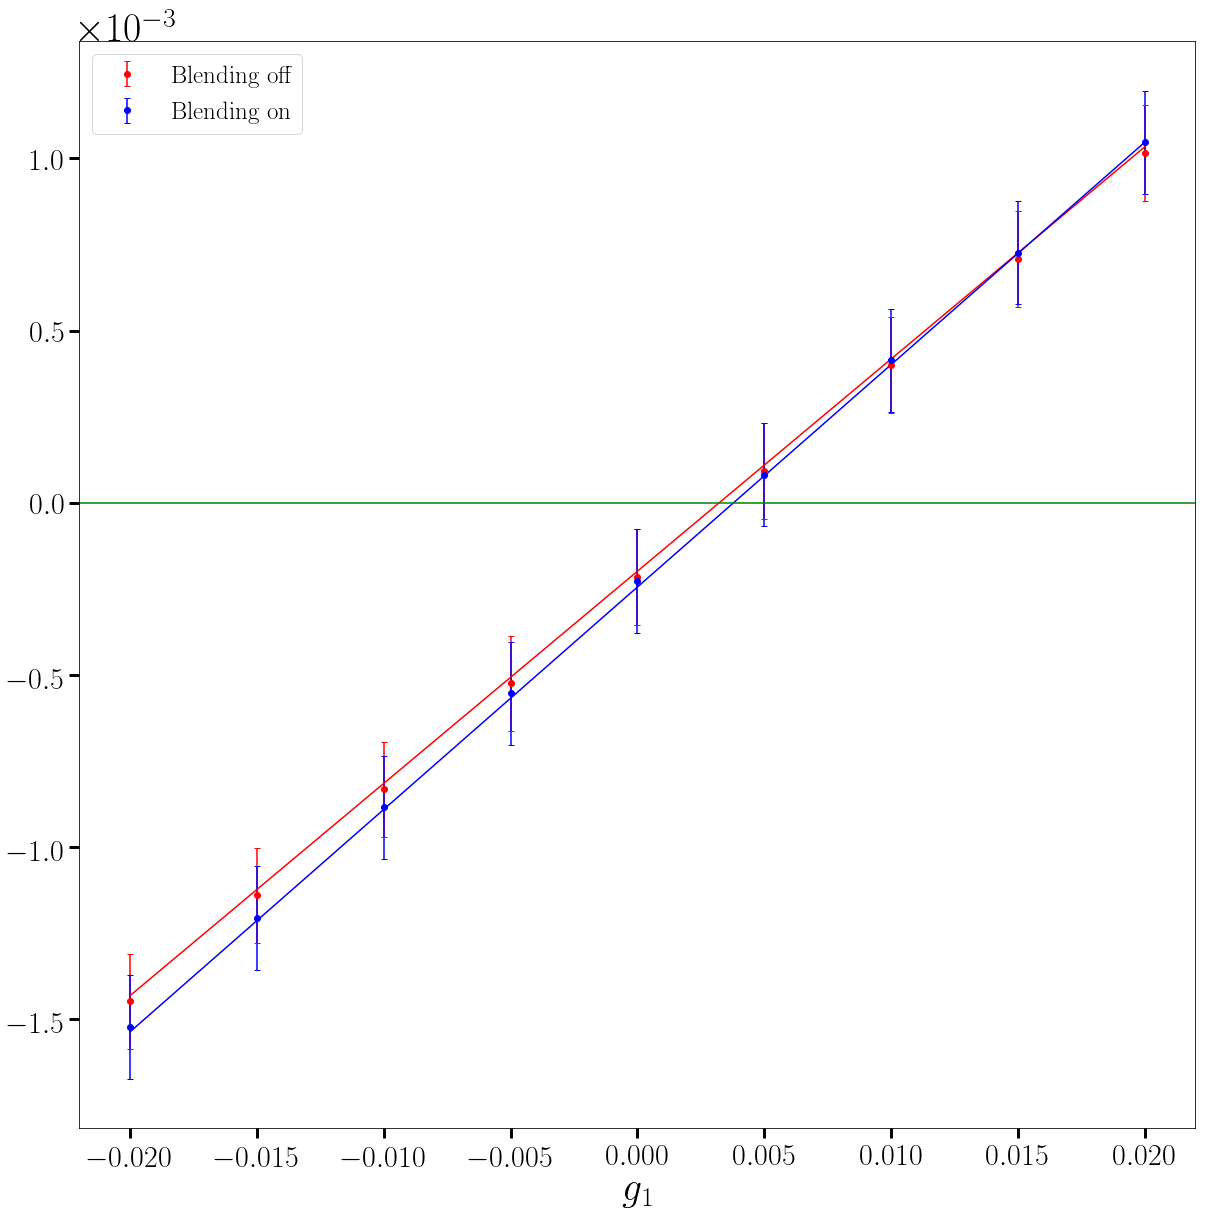

In [108]:
money.make_money_plot(g1s, values, errs, values_grp, errs_grp, betas, ticks1=None, labely1=None)

# Fisher elements

## preamble

In [6]:
from corner import corner
def get_fish_matrices(path, fits_file, grp_id, descwl):
    reader = descwl.output.Reader(os.path.join(path, fits_file))
    results = reader.results
    selected = results.select(f'grp_id=={grp_id}')
    sort_order = np.argsort(results.table['grp_rank'][selected])
    selected = selected[sort_order]
    fisher, cov, var, corr = results.get_matrices(selected)
    return (fisher, cov, var, corr), selected 

#alpha is decimal 
def remove_outliers(arr,alpha, tail='symmetric'):
    arr = np.array(arr)


    if tail=='symmetric':
        q1 = np.quantile(arr, alpha/2)
        q2 = np.quantile(arr, 1 - alpha/2)
        return arr[(arr>q1)&(arr<q2)]

    elif tail=='left':
        q1 = np.quantile(arr, alpha)
        return arr[arr>q1]

    elif tail=='right':
        q2 = np.quantile(arr, 1 - alpha)
        return arr[arr<q2]

    else: 
        raise NotImplementedError() 

In [32]:
reader = descwl.output.Reader(os.path.join(path, fits_file))
results = reader.results
selected = results.select(f'grp_id=={grp_id}')

In [34]:
results

In [31]:
cat[cat['grp_id']==2200133058]

db_id,grp_id,grp_size,grp_rank,visible,xmin,xmax,ymin,ymax,f_disk,f_bulge,dx,dy,z,ab_mag,ri_color,flux,sigma_m,sigma_p,e1,e2,a,b,beta,psf_sigm,purity,snr_sky,snr_iso,snr_grp,snr_isof,snr_grpf,ds,dg1,dg2,ds_grp,dg1_grp,dg2_grp,cond_num,cond_num_grp
int64,int64,int16,int16,int16,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
2200133058,2200133058,1,0,0,1787,1828,383,425,0.95008916,0.049910843,181.56596,-99.040634,0.8176027,21.25777,0.6515446,2232746.2,0.77113897,0.77867985,-0.016582873,-0.09724257,0.8513615,0.69847566,-0.8698513,0.99077237,1.0,371.2695,354.5316,354.5316,215.3808,215.3808,0.0056208717,0.0045715393,0.004660068,0.0056208717,0.0045715393,0.004660068,16790171000000.0,16790171000000.0


In [7]:
path = '/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/WLD/data'
fits_file='idemo1.fits'

from WeakLensingDeblending import descwl
cat = Table.read(os.path.join(path, fits_file))
iso_cat = cat[cat['grp_size']==1]

In [10]:
fishers = [] 
for row in tqdm(iso_cat): 
    grp_id = row['grp_id']
    print(grp_id)
    (fisher, cov, var, corr), _ = get_fish_matrices(path, fits_file, grp_id, descwl)
    fishers.append(fisher)

  0%|          | 0/1635 [00:00<?, ?it/s]

2200133058


  0%|          | 1/1635 [00:01<45:33,  1.67s/it]

2208710180


  0%|          | 2/1635 [00:02<39:58,  1.47s/it]

2213024568


  0%|          | 3/1635 [00:03<36:04,  1.33s/it]

2217355924


  0%|          | 4/1635 [00:04<33:33,  1.23s/it]

2200460649


KeyboardInterrupt: 

## plot triangle plot (not corner) of fisher elements. 

In [ ]:
#convert into corner format. 
fisher_elems = {} 
for fisher in tqdm(fishers): 
    for i in range(6):
        for j in range(0,i+1): 
            
            if fisher_elems.get((i,j),None) is None: 
                fisher_elems[(i,j)] = [] 
                
            fisher_elems[(i,j)].append(fisher[i,j])

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(14, 14))
names = ['flux', 'x0', 'y0', 'ds', 'dg1', 'dg2'] #correct order. 
for i in range(6):
    for j in range(0,i+1):
        if i==j:
            tail="right"
        else: 
            tail="symmetric"
            
        axes[i,j].hist(remove_outliers(fisher_elems[i,j],0, tail=tail), bins=100)
        axes[i,j].tick_params(axis='x', which='major', labelsize=10) 
        axes[i,j].ticklabel_format(style='sci', axis='x', scilimits=(-2, 2))
        if j==0:
            axes[i,j].set_ylabel(names[i], size=10)
        if i==5:
            axes[i,j].set_xlabel(names[j], size=10)

fig.subplots_adjust(wspace=0.7,
                    hspace=0.5,
                    left=0.125, right=0.9,
                    top=0.9, bottom=0.1)

## plot histograms of eigenvector coefficients. 

In [ ]:
for fish in fishers: 
    w, v = np.linalg.eig(fish) #w = eigenvalues, v = eigen
    vt = v.T # the rows are the eigenvectors instead of the columns. row i corresponds to eigenvalue i . 
    vt = vt[np.argsort(w)] #sort the rows according to the eigenvalues. 
    v1 = vt[0, :] #get the first row which corresponds to minimum eigenvalue vector. 
    v2 = vt[-1, :]#get the last row which corresponds to maximum eigenvalue vector. 

coefficients =

# Errors on parameters 